In [1]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.3 MB/s eta 0:00:00


In [2]:
#create samples :
import os
import torch
import pickle
import pandas as pd

def load_graph(path, is_pickle=True):
    """
    Load a molecule graph (.pkl) or a protein graph (.pt).
    If is_pickle is True, use pickle to load the file; otherwise, use torch.load.
    """
    if is_pickle:
        with open(path, 'rb') as f:
            return pickle.load(f)
    else:
        return torch.load(path)

def prepare_dataset_individual_save_as_pt(filtered_dataset, molecule_graph_dir, protein_graph_dir, output_dir):
    """
    Incrementally prepares the dataset and saves each (molecule, protein, target) tuple as a separate .pt file.

    Args:
    - filtered_dataset: The filtered KIBA dataset (DataFrame).
    - molecule_graph_dir: Directory where molecule graphs are stored.
    - protein_graph_dir: Directory where protein graphs are stored.
    - output_dir: Directory to save the prepared dataset incrementally.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for index, row in filtered_dataset.iterrows():
        protein_id = row['Target_ID']
        chembl_id = row['Drug_ID']

        # Load the protein graph (.pt)
        pro_graph_path = os.path.join(protein_graph_dir, f"{protein_id}_graph.pt")
        if not os.path.exists(pro_graph_path):
            print(f"Protein graph not found: {protein_id}")
            continue
        pro_graph = load_graph(pro_graph_path, is_pickle=False)

        # Load the molecule graph (.pkl)
        mol_graph_path = os.path.join(molecule_graph_dir, f"{chembl_id}_graph.pkl")
        if not os.path.exists(mol_graph_path):
            print(f"Molecule graph not found: {chembl_id}")
            continue
        mol_graph = load_graph(mol_graph_path)

        # Load target (affinity value)
        target = torch.tensor([row['Y']], dtype=torch.float)

        # Create the sample as a tuple (molecule graph, protein graph, target)
        sample = (mol_graph, pro_graph, target)

        # Save the sample as a .pt file
        sample_path = os.path.join(output_dir, f"sample_{index}.pt")
        torch.save(sample, sample_path)

        if(index%10000 == 0 ):
            print(f"Saved sample {index} as {sample_path}")




# Example usage for individual saving
molecule_graph_dir = '/kaggle/input/graphs/molecule_graphs'  # Directory where molecule graphs are stored
protein_graph_dir = '/kaggle/input/graphs/ProteinGraphs'  # Directory where protein graphs are stored
filtered_dataset_path = '/kaggle/input/graphs/filtered_DavisDataSet.csv'  # Path to the filtered dataset CSV
output_dir = 'prepared_samples/'  # Directory to save individual samples

# Load filtered dataset CSV
filtered_dataset = pd.read_csv(filtered_dataset_path)

# Prepare the dataset incrementally, saving each sample as a .pt file
prepare_dataset_individual_save_as_pt(filtered_dataset, molecule_graph_dir, protein_graph_dir, output_dir)

print("Dataset preparation completed.")


<ipython-input-2-c90b9d14e3c5>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(path)


Saved sample 0 as prepared_samples/sample_0.pt


<ipython-input-2-c90b9d14e3c5>:16: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(path)


Saved sample 10000 as prepared_samples/sample_10000.pt
Dataset preparation completed.


Running on cuda.
Checkpoints will be saved to: /kaggle/working/TrainingModel1
Starting fresh metrics tracking.
GNNNet Loaded
No existing checkpoint found; starting fresh.


Training:   0%|          | 0/250 [00:59<?, ?epoch/s]

[Epoch 1/250] Training Loss: 1.4235


Training:   0%|          | 1/250 [02:13<9:14:36, 133.64s/epoch]

  Train => MSE=0.6911, CI=0.7044, Pearson=0.4149
  Test  => MSE=0.6491, CI=0.6935, Pearson=0.3825
Checkpoint saved at epoch 1


Training:   0%|          | 1/250 [03:10<9:14:36, 133.64s/epoch]

[Epoch 2/250] Training Loss: 0.7385


Training:   1%|          | 2/250 [04:22<9:01:04, 130.90s/epoch]

  Train => MSE=0.6234, CI=0.7272, Pearson=0.4675
  Test  => MSE=0.5895, CI=0.7162, Pearson=0.4460
Checkpoint saved at epoch 2
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch1.pt


Training:   1%|          | 2/250 [05:19<9:01:04, 130.90s/epoch]

[Epoch 3/250] Training Loss: 0.7230


Training:   1%|          | 3/250 [06:31<8:54:23, 129.81s/epoch]

  Train => MSE=0.5840, CI=0.7365, Pearson=0.4899
  Test  => MSE=0.5531, CI=0.7270, Pearson=0.4721
Checkpoint saved at epoch 3
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch2.pt


Training:   1%|          | 3/250 [07:28<8:54:23, 129.81s/epoch]

[Epoch 4/250] Training Loss: 0.6869


Training:   2%|▏         | 4/250 [08:39<8:50:08, 129.30s/epoch]

  Train => MSE=0.5786, CI=0.7390, Pearson=0.4926
  Test  => MSE=0.5491, CI=0.7315, Pearson=0.4742
Checkpoint saved at epoch 4
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch3.pt


Training:   2%|▏         | 4/250 [09:36<8:50:08, 129.30s/epoch]

[Epoch 5/250] Training Loss: 0.6623


Training:   2%|▏         | 5/250 [10:48<8:46:35, 128.96s/epoch]

  Train => MSE=0.6504, CI=0.7513, Pearson=0.5146
  Test  => MSE=0.6149, CI=0.7456, Pearson=0.4993
Checkpoint saved at epoch 5
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch4.pt


Training:   2%|▏         | 5/250 [11:45<8:46:35, 128.96s/epoch]

[Epoch 6/250] Training Loss: 0.6361


Training:   2%|▏         | 6/250 [12:56<8:43:53, 128.83s/epoch]

  Train => MSE=0.6235, CI=0.7495, Pearson=0.5331
  Test  => MSE=0.5885, CI=0.7425, Pearson=0.5225
Checkpoint saved at epoch 6
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch5.pt


Training:   2%|▏         | 6/250 [13:53<8:43:53, 128.83s/epoch]

[Epoch 7/250] Training Loss: 0.6268


Training:   3%|▎         | 7/250 [15:05<8:41:19, 128.72s/epoch]

  Train => MSE=0.7683, CI=0.7649, Pearson=0.5513
  Test  => MSE=0.7259, CI=0.7630, Pearson=0.5428
Checkpoint saved at epoch 7
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch6.pt


Training:   3%|▎         | 7/250 [16:02<8:41:19, 128.72s/epoch]

[Epoch 8/250] Training Loss: 0.6290


Training:   3%|▎         | 8/250 [17:13<8:38:56, 128.66s/epoch]

  Train => MSE=0.6580, CI=0.7643, Pearson=0.5663
  Test  => MSE=0.6198, CI=0.7599, Pearson=0.5624
Checkpoint saved at epoch 8
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch7.pt


Training:   3%|▎         | 8/250 [18:10<8:38:56, 128.66s/epoch]

[Epoch 9/250] Training Loss: 0.6101


Training:   4%|▎         | 9/250 [19:21<8:36:21, 128.55s/epoch]

  Train => MSE=0.6268, CI=0.7714, Pearson=0.5724
  Test  => MSE=0.5877, CI=0.7711, Pearson=0.5745
Checkpoint saved at epoch 9
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch8.pt


Training:   4%|▎         | 9/250 [20:18<8:36:21, 128.55s/epoch]

[Epoch 10/250] Training Loss: 0.5964


Training:   4%|▍         | 10/250 [21:30<8:34:14, 128.56s/epoch]

  Train => MSE=0.6428, CI=0.7755, Pearson=0.5543
  Test  => MSE=0.6102, CI=0.7729, Pearson=0.5392
Checkpoint saved at epoch 10
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch9.pt


Training:   4%|▍         | 10/250 [22:27<8:34:14, 128.56s/epoch]

[Epoch 11/250] Training Loss: 0.5938


Training:   4%|▍         | 11/250 [23:38<8:31:45, 128.48s/epoch]

  Train => MSE=0.5774, CI=0.7830, Pearson=0.5922
  Test  => MSE=0.5448, CI=0.7779, Pearson=0.5874
Checkpoint saved at epoch 11
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch10.pt


Training:   4%|▍         | 11/250 [24:35<8:31:45, 128.48s/epoch]

[Epoch 12/250] Training Loss: 0.5862


Training:   5%|▍         | 12/250 [25:47<8:29:33, 128.46s/epoch]

  Train => MSE=0.5555, CI=0.7813, Pearson=0.5814
  Test  => MSE=0.5226, CI=0.7762, Pearson=0.5777
Checkpoint saved at epoch 12
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch11.pt


Training:   5%|▍         | 12/250 [26:44<8:29:33, 128.46s/epoch]

[Epoch 13/250] Training Loss: 0.5838


Training:   5%|▌         | 13/250 [27:55<8:27:12, 128.41s/epoch]

  Train => MSE=0.5568, CI=0.7855, Pearson=0.6014
  Test  => MSE=0.5280, CI=0.7804, Pearson=0.5933
Checkpoint saved at epoch 13
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch12.pt


Training:   5%|▌         | 13/250 [28:52<8:27:12, 128.41s/epoch]

[Epoch 14/250] Training Loss: 0.5732


Training:   6%|▌         | 14/250 [30:04<8:25:10, 128.43s/epoch]

  Train => MSE=0.5413, CI=0.7852, Pearson=0.5979
  Test  => MSE=0.5113, CI=0.7790, Pearson=0.5896
Checkpoint saved at epoch 14
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch13.pt


Training:   6%|▌         | 14/250 [31:00<8:25:10, 128.43s/epoch]

[Epoch 15/250] Training Loss: 0.5736


Training:   6%|▌         | 15/250 [32:12<8:22:43, 128.35s/epoch]

  Train => MSE=0.5269, CI=0.7860, Pearson=0.5954
  Test  => MSE=0.4993, CI=0.7799, Pearson=0.5846
Checkpoint saved at epoch 15
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch14.pt


Training:   6%|▌         | 15/250 [33:09<8:22:43, 128.35s/epoch]

[Epoch 16/250] Training Loss: 0.5662


Training:   6%|▋         | 16/250 [34:20<8:20:37, 128.36s/epoch]

  Train => MSE=0.5532, CI=0.7892, Pearson=0.6028
  Test  => MSE=0.5235, CI=0.7837, Pearson=0.5954
Checkpoint saved at epoch 16
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch15.pt


Training:   6%|▋         | 16/250 [35:17<8:20:37, 128.36s/epoch]

[Epoch 17/250] Training Loss: 0.5581


Training:   7%|▋         | 17/250 [36:29<8:18:39, 128.41s/epoch]

  Train => MSE=0.5517, CI=0.7934, Pearson=0.6129
  Test  => MSE=0.5241, CI=0.7865, Pearson=0.6023
Checkpoint saved at epoch 17
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch16.pt


Training:   7%|▋         | 17/250 [37:25<8:18:39, 128.41s/epoch]

[Epoch 18/250] Training Loss: 0.5569


Training:   7%|▋         | 18/250 [38:37<8:16:25, 128.39s/epoch]

  Train => MSE=0.5709, CI=0.7964, Pearson=0.6070
  Test  => MSE=0.5386, CI=0.7889, Pearson=0.5979
Checkpoint saved at epoch 18
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch17.pt


Training:   7%|▋         | 18/250 [39:34<8:16:25, 128.39s/epoch]

[Epoch 19/250] Training Loss: 0.5512


Training:   8%|▊         | 19/250 [40:45<8:14:00, 128.32s/epoch]

  Train => MSE=0.5138, CI=0.7993, Pearson=0.6297
  Test  => MSE=0.4903, CI=0.7931, Pearson=0.6155
Checkpoint saved at epoch 19
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch18.pt


Training:   8%|▊         | 19/250 [41:42<8:14:00, 128.32s/epoch]

[Epoch 20/250] Training Loss: 0.5468


Training:   8%|▊         | 20/250 [42:54<8:12:01, 128.35s/epoch]

  Train => MSE=0.5171, CI=0.7946, Pearson=0.6199
  Test  => MSE=0.4913, CI=0.7905, Pearson=0.6074
Checkpoint saved at epoch 20
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch19.pt


Training:   8%|▊         | 20/250 [43:50<8:12:01, 128.35s/epoch]

[Epoch 21/250] Training Loss: 0.5384


Training:   8%|▊         | 21/250 [45:02<8:09:33, 128.27s/epoch]

  Train => MSE=0.5019, CI=0.7975, Pearson=0.6193
  Test  => MSE=0.4798, CI=0.7908, Pearson=0.6053
Checkpoint saved at epoch 21
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch20.pt


Training:   8%|▊         | 21/250 [45:59<8:09:33, 128.27s/epoch]

[Epoch 22/250] Training Loss: 0.5344


Training:   9%|▉         | 22/250 [47:10<8:07:40, 128.33s/epoch]

  Train => MSE=0.6217, CI=0.8020, Pearson=0.6338
  Test  => MSE=0.5996, CI=0.7946, Pearson=0.6169
Checkpoint saved at epoch 22
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch21.pt


Training:   9%|▉         | 22/250 [48:07<8:07:40, 128.33s/epoch]

[Epoch 23/250] Training Loss: 0.5420


Training:   9%|▉         | 23/250 [49:18<8:05:16, 128.27s/epoch]

  Train => MSE=0.4789, CI=0.8005, Pearson=0.6352
  Test  => MSE=0.4624, CI=0.7955, Pearson=0.6156
Checkpoint saved at epoch 23
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch22.pt


Training:   9%|▉         | 23/250 [50:15<8:05:16, 128.27s/epoch]

[Epoch 24/250] Training Loss: 0.5369


Training:  10%|▉         | 24/250 [51:27<8:03:17, 128.31s/epoch]

  Train => MSE=0.5066, CI=0.8007, Pearson=0.6325
  Test  => MSE=0.4915, CI=0.7947, Pearson=0.6114
Checkpoint saved at epoch 24
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch23.pt


Training:  10%|▉         | 24/250 [52:23<8:03:17, 128.31s/epoch]

[Epoch 25/250] Training Loss: 0.5260


Training:  10%|█         | 25/250 [53:35<8:01:05, 128.29s/epoch]

  Train => MSE=0.4834, CI=0.8047, Pearson=0.6451
  Test  => MSE=0.4632, CI=0.7968, Pearson=0.6262
Checkpoint saved at epoch 25
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch24.pt


Training:  10%|█         | 25/250 [54:32<8:01:05, 128.29s/epoch]

[Epoch 26/250] Training Loss: 0.5323


Training:  10%|█         | 26/250 [55:43<7:59:01, 128.31s/epoch]

  Train => MSE=0.4461, CI=0.8048, Pearson=0.6453
  Test  => MSE=0.4348, CI=0.7993, Pearson=0.6250
Checkpoint saved at epoch 26
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch25.pt


Training:  10%|█         | 26/250 [56:40<7:59:01, 128.31s/epoch]

[Epoch 27/250] Training Loss: 0.5217


Training:  11%|█         | 27/250 [57:52<7:57:06, 128.37s/epoch]

  Train => MSE=0.4822, CI=0.8023, Pearson=0.6404
  Test  => MSE=0.4769, CI=0.7956, Pearson=0.6133
Checkpoint saved at epoch 27
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch26.pt


Training:  11%|█         | 27/250 [58:49<7:57:06, 128.37s/epoch]

[Epoch 28/250] Training Loss: 0.5161


Training:  11%|█         | 28/250 [1:00:00<7:54:48, 128.33s/epoch]

  Train => MSE=0.4620, CI=0.8034, Pearson=0.6389
  Test  => MSE=0.4489, CI=0.7986, Pearson=0.6178
Checkpoint saved at epoch 28
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch27.pt


Training:  11%|█         | 28/250 [1:00:57<7:54:48, 128.33s/epoch]

[Epoch 29/250] Training Loss: 0.4986


Training:  12%|█▏        | 29/250 [1:02:08<7:52:36, 128.31s/epoch]

  Train => MSE=0.4878, CI=0.8039, Pearson=0.6532
  Test  => MSE=0.4736, CI=0.8013, Pearson=0.6325
Checkpoint saved at epoch 29
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch28.pt


Training:  12%|█▏        | 29/250 [1:03:05<7:52:36, 128.31s/epoch]

[Epoch 30/250] Training Loss: 0.4995


Training:  12%|█▏        | 30/250 [1:04:16<7:50:27, 128.31s/epoch]

  Train => MSE=0.4736, CI=0.8076, Pearson=0.6533
  Test  => MSE=0.4692, CI=0.8006, Pearson=0.6234
Checkpoint saved at epoch 30
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch29.pt


Training:  12%|█▏        | 30/250 [1:05:13<7:50:27, 128.31s/epoch]

[Epoch 31/250] Training Loss: 0.5093


Training:  12%|█▏        | 31/250 [1:06:25<7:48:03, 128.23s/epoch]

  Train => MSE=0.4826, CI=0.8004, Pearson=0.6492
  Test  => MSE=0.4755, CI=0.7942, Pearson=0.6251
Checkpoint saved at epoch 31
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch30.pt


Training:  12%|█▏        | 31/250 [1:07:21<7:48:03, 128.23s/epoch]

[Epoch 32/250] Training Loss: 0.4932


Training:  13%|█▎        | 32/250 [1:08:33<7:46:00, 128.26s/epoch]

  Train => MSE=0.4953, CI=0.7992, Pearson=0.6650
  Test  => MSE=0.4910, CI=0.7891, Pearson=0.6320
Checkpoint saved at epoch 32
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch31.pt


Training:  13%|█▎        | 32/250 [1:09:30<7:46:00, 128.26s/epoch]

[Epoch 33/250] Training Loss: 0.5002


Training:  13%|█▎        | 33/250 [1:10:41<7:43:40, 128.21s/epoch]

  Train => MSE=0.4185, CI=0.8091, Pearson=0.6716
  Test  => MSE=0.4163, CI=0.8028, Pearson=0.6435
Checkpoint saved at epoch 33
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch32.pt


Training:  13%|█▎        | 33/250 [1:11:38<7:43:40, 128.21s/epoch]

[Epoch 34/250] Training Loss: 0.4877


Training:  14%|█▎        | 34/250 [1:12:49<7:41:45, 128.27s/epoch]

  Train => MSE=0.4542, CI=0.7978, Pearson=0.6427
  Test  => MSE=0.4574, CI=0.7898, Pearson=0.6080
Checkpoint saved at epoch 34
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch33.pt


Training:  14%|█▎        | 34/250 [1:13:46<7:41:45, 128.27s/epoch]

[Epoch 35/250] Training Loss: 0.4842


Training:  14%|█▍        | 35/250 [1:14:57<7:39:26, 128.22s/epoch]

  Train => MSE=0.4444, CI=0.8113, Pearson=0.6618
  Test  => MSE=0.4431, CI=0.8058, Pearson=0.6290
Checkpoint saved at epoch 35
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch34.pt


Training:  14%|█▍        | 35/250 [1:15:54<7:39:26, 128.22s/epoch]

[Epoch 36/250] Training Loss: 0.4845


Training:  14%|█▍        | 36/250 [1:17:06<7:37:18, 128.22s/epoch]

  Train => MSE=0.4588, CI=0.8137, Pearson=0.6659
  Test  => MSE=0.4608, CI=0.8063, Pearson=0.6272
Checkpoint saved at epoch 36
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch35.pt


Training:  14%|█▍        | 36/250 [1:18:03<7:37:18, 128.22s/epoch]

[Epoch 37/250] Training Loss: 0.4774


Training:  15%|█▍        | 37/250 [1:19:14<7:35:10, 128.22s/epoch]

  Train => MSE=0.4389, CI=0.8023, Pearson=0.6644
  Test  => MSE=0.4496, CI=0.7960, Pearson=0.6261
Checkpoint saved at epoch 37
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch36.pt


Training:  15%|█▍        | 37/250 [1:20:11<7:35:10, 128.22s/epoch]

[Epoch 38/250] Training Loss: 0.4741


Training:  15%|█▌        | 38/250 [1:21:22<7:33:08, 128.25s/epoch]

  Train => MSE=0.4182, CI=0.8103, Pearson=0.6766
  Test  => MSE=0.4297, CI=0.8044, Pearson=0.6399
Checkpoint saved at epoch 38
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch37.pt


Training:  15%|█▌        | 38/250 [1:22:19<7:33:08, 128.25s/epoch]

[Epoch 39/250] Training Loss: 0.4730


Training:  16%|█▌        | 39/250 [1:23:30<7:30:57, 128.24s/epoch]

  Train => MSE=0.4389, CI=0.8056, Pearson=0.6721
  Test  => MSE=0.4522, CI=0.7982, Pearson=0.6370
Checkpoint saved at epoch 39
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch38.pt


Training:  16%|█▌        | 39/250 [1:24:27<7:30:57, 128.24s/epoch]

[Epoch 40/250] Training Loss: 0.4665


Training:  16%|█▌        | 40/250 [1:25:39<7:28:48, 128.23s/epoch]

  Train => MSE=0.4041, CI=0.8097, Pearson=0.6892
  Test  => MSE=0.4135, CI=0.8009, Pearson=0.6547
Checkpoint saved at epoch 40
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch39.pt


Training:  16%|█▌        | 40/250 [1:26:35<7:28:48, 128.23s/epoch]

[Epoch 41/250] Training Loss: 0.4655


Training:  16%|█▋        | 41/250 [1:27:47<7:26:26, 128.17s/epoch]

  Train => MSE=0.4029, CI=0.8110, Pearson=0.6930
  Test  => MSE=0.4147, CI=0.8042, Pearson=0.6588
Checkpoint saved at epoch 41
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch40.pt


Training:  16%|█▋        | 41/250 [1:28:43<7:26:26, 128.17s/epoch]

[Epoch 42/250] Training Loss: 0.4526


Training:  17%|█▋        | 42/250 [1:29:55<7:24:25, 128.20s/epoch]

  Train => MSE=0.4222, CI=0.8106, Pearson=0.6800
  Test  => MSE=0.4346, CI=0.8052, Pearson=0.6433
Checkpoint saved at epoch 42
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch41.pt


Training:  17%|█▋        | 42/250 [1:30:52<7:24:25, 128.20s/epoch]

[Epoch 43/250] Training Loss: 0.4621


Training:  17%|█▋        | 43/250 [1:32:03<7:22:21, 128.22s/epoch]

  Train => MSE=0.4065, CI=0.8118, Pearson=0.6937
  Test  => MSE=0.4175, CI=0.8021, Pearson=0.6610
Checkpoint saved at epoch 43
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch42.pt


Training:  17%|█▋        | 43/250 [1:33:00<7:22:21, 128.22s/epoch]

[Epoch 44/250] Training Loss: 0.4513


Training:  18%|█▊        | 44/250 [1:34:11<7:20:17, 128.24s/epoch]

  Train => MSE=0.4252, CI=0.8009, Pearson=0.6828
  Test  => MSE=0.4424, CI=0.7896, Pearson=0.6456
Checkpoint saved at epoch 44
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch43.pt


Training:  18%|█▊        | 44/250 [1:35:08<7:20:17, 128.24s/epoch]

[Epoch 45/250] Training Loss: 0.4407


Training:  18%|█▊        | 45/250 [1:36:20<7:17:57, 128.18s/epoch]

  Train => MSE=0.4210, CI=0.8135, Pearson=0.6917
  Test  => MSE=0.4377, CI=0.8043, Pearson=0.6560
Checkpoint saved at epoch 45
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch44.pt


Training:  18%|█▊        | 45/250 [1:37:16<7:17:57, 128.18s/epoch]

[Epoch 46/250] Training Loss: 0.4460


Training:  18%|█▊        | 46/250 [1:38:28<7:15:51, 128.19s/epoch]

  Train => MSE=0.4092, CI=0.8096, Pearson=0.6912
  Test  => MSE=0.4309, CI=0.7988, Pearson=0.6492
Checkpoint saved at epoch 46
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch45.pt


Training:  18%|█▊        | 46/250 [1:39:25<7:15:51, 128.19s/epoch]

[Epoch 47/250] Training Loss: 0.4384


Training:  19%|█▉        | 47/250 [1:40:36<7:13:44, 128.20s/epoch]

  Train => MSE=0.3949, CI=0.8165, Pearson=0.7070
  Test  => MSE=0.4229, CI=0.8059, Pearson=0.6612
Checkpoint saved at epoch 47
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch46.pt


Training:  19%|█▉        | 47/250 [1:41:33<7:13:44, 128.20s/epoch]

[Epoch 48/250] Training Loss: 0.4309


Training:  19%|█▉        | 48/250 [1:42:44<7:11:40, 128.22s/epoch]

  Train => MSE=0.4208, CI=0.8158, Pearson=0.6884
  Test  => MSE=0.4443, CI=0.8064, Pearson=0.6453
Checkpoint saved at epoch 48
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch47.pt


Training:  19%|█▉        | 48/250 [1:43:41<7:11:40, 128.22s/epoch]

[Epoch 49/250] Training Loss: 0.4256


Training:  20%|█▉        | 49/250 [1:44:52<7:09:15, 128.14s/epoch]

  Train => MSE=0.4317, CI=0.8191, Pearson=0.7023
  Test  => MSE=0.4447, CI=0.8133, Pearson=0.6679
Checkpoint saved at epoch 49
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch48.pt


Training:  20%|█▉        | 49/250 [1:45:49<7:09:15, 128.14s/epoch]

[Epoch 50/250] Training Loss: 0.4340


Training:  20%|██        | 50/250 [1:47:00<7:07:09, 128.15s/epoch]

  Train => MSE=0.3634, CI=0.8270, Pearson=0.7242
  Test  => MSE=0.3754, CI=0.8208, Pearson=0.6908
Checkpoint saved at epoch 50
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch49.pt


Training:  20%|██        | 50/250 [1:47:57<7:07:09, 128.15s/epoch]

[Epoch 51/250] Training Loss: 0.4196


Training:  20%|██        | 51/250 [1:49:08<7:04:47, 128.08s/epoch]

  Train => MSE=0.3614, CI=0.8280, Pearson=0.7253
  Test  => MSE=0.3772, CI=0.8202, Pearson=0.6885
Checkpoint saved at epoch 51
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch50.pt


Training:  20%|██        | 51/250 [1:50:05<7:04:47, 128.08s/epoch]

[Epoch 52/250] Training Loss: 0.4138


Training:  21%|██        | 52/250 [1:51:16<7:02:46, 128.11s/epoch]

  Train => MSE=0.3977, CI=0.8179, Pearson=0.7001
  Test  => MSE=0.4204, CI=0.8047, Pearson=0.6550
Checkpoint saved at epoch 52
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch51.pt


Training:  21%|██        | 52/250 [1:52:13<7:02:46, 128.11s/epoch]

[Epoch 53/250] Training Loss: 0.4012


Training:  21%|██        | 53/250 [1:53:25<7:00:39, 128.12s/epoch]

  Train => MSE=0.3538, CI=0.8286, Pearson=0.7306
  Test  => MSE=0.3668, CI=0.8217, Pearson=0.6954
Checkpoint saved at epoch 53
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch52.pt


Training:  21%|██        | 53/250 [1:54:22<7:00:39, 128.12s/epoch]

[Epoch 54/250] Training Loss: 0.3993


Training:  22%|██▏       | 54/250 [1:55:33<6:58:33, 128.13s/epoch]

  Train => MSE=0.3735, CI=0.8242, Pearson=0.7140
  Test  => MSE=0.3952, CI=0.8139, Pearson=0.6690
Checkpoint saved at epoch 54
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch53.pt


Training:  22%|██▏       | 54/250 [1:56:29<6:58:33, 128.13s/epoch]

[Epoch 55/250] Training Loss: 0.4040


Training:  22%|██▏       | 55/250 [1:57:41<6:56:11, 128.06s/epoch]

  Train => MSE=0.3547, CI=0.8240, Pearson=0.7300
  Test  => MSE=0.3735, CI=0.8145, Pearson=0.6882
Checkpoint saved at epoch 55
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch54.pt


Training:  22%|██▏       | 55/250 [1:58:38<6:56:11, 128.06s/epoch]

[Epoch 56/250] Training Loss: 0.4013


Training:  22%|██▏       | 56/250 [1:59:49<6:54:07, 128.08s/epoch]

  Train => MSE=0.3672, CI=0.8206, Pearson=0.7193
  Test  => MSE=0.3964, CI=0.8069, Pearson=0.6680
Checkpoint saved at epoch 56
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch55.pt


Training:  22%|██▏       | 56/250 [2:00:46<6:54:07, 128.08s/epoch]

[Epoch 57/250] Training Loss: 0.3953


Training:  23%|██▎       | 57/250 [2:01:57<6:52:04, 128.10s/epoch]

  Train => MSE=0.3480, CI=0.8274, Pearson=0.7372
  Test  => MSE=0.3700, CI=0.8148, Pearson=0.6937
Checkpoint saved at epoch 57
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch56.pt


Training:  23%|██▎       | 57/250 [2:02:54<6:52:04, 128.10s/epoch]

[Epoch 58/250] Training Loss: 0.3906


Training:  23%|██▎       | 58/250 [2:04:05<6:50:02, 128.14s/epoch]

  Train => MSE=0.3622, CI=0.8227, Pearson=0.7289
  Test  => MSE=0.3862, CI=0.8070, Pearson=0.6847
Checkpoint saved at epoch 58
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch57.pt


Training:  23%|██▎       | 58/250 [2:05:02<6:50:02, 128.14s/epoch]

[Epoch 59/250] Training Loss: 0.3917


Training:  24%|██▎       | 59/250 [2:06:13<6:47:46, 128.10s/epoch]

  Train => MSE=0.3947, CI=0.8193, Pearson=0.7005
  Test  => MSE=0.4154, CI=0.8033, Pearson=0.6472
Checkpoint saved at epoch 59
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch58.pt


Training:  24%|██▎       | 59/250 [2:07:10<6:47:46, 128.10s/epoch]

[Epoch 60/250] Training Loss: 0.3919


Training:  24%|██▍       | 60/250 [2:08:21<6:45:45, 128.13s/epoch]

  Train => MSE=0.3447, CI=0.8332, Pearson=0.7452
  Test  => MSE=0.3619, CI=0.8202, Pearson=0.7052
Checkpoint saved at epoch 60
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch59.pt


Training:  24%|██▍       | 60/250 [2:09:18<6:45:45, 128.13s/epoch]

[Epoch 61/250] Training Loss: 0.3799


Training:  24%|██▍       | 61/250 [2:10:29<6:43:33, 128.12s/epoch]

  Train => MSE=0.3468, CI=0.8302, Pearson=0.7388
  Test  => MSE=0.3766, CI=0.8123, Pearson=0.6873
Checkpoint saved at epoch 61
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch60.pt


Training:  24%|██▍       | 61/250 [2:11:26<6:43:33, 128.12s/epoch]

[Epoch 62/250] Training Loss: 0.3768


Training:  25%|██▍       | 62/250 [2:12:38<6:41:25, 128.12s/epoch]

  Train => MSE=0.3405, CI=0.8330, Pearson=0.7490
  Test  => MSE=0.3637, CI=0.8221, Pearson=0.7056
Checkpoint saved at epoch 62
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch61.pt


Training:  25%|██▍       | 62/250 [2:13:34<6:41:25, 128.12s/epoch]

[Epoch 63/250] Training Loss: 0.3775


Training:  25%|██▌       | 63/250 [2:14:46<6:39:09, 128.07s/epoch]

  Train => MSE=0.3606, CI=0.8297, Pearson=0.7320
  Test  => MSE=0.3825, CI=0.8164, Pearson=0.6840
Checkpoint saved at epoch 63
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch62.pt


Training:  25%|██▌       | 63/250 [2:15:42<6:39:09, 128.07s/epoch]

[Epoch 64/250] Training Loss: 0.3784


Training:  26%|██▌       | 64/250 [2:16:54<6:36:59, 128.06s/epoch]

  Train => MSE=0.3382, CI=0.8311, Pearson=0.7452
  Test  => MSE=0.3566, CI=0.8188, Pearson=0.7039
Checkpoint saved at epoch 64
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch63.pt


Training:  26%|██▌       | 64/250 [2:17:50<6:36:59, 128.06s/epoch]

[Epoch 65/250] Training Loss: 0.3770


Training:  26%|██▌       | 65/250 [2:19:02<6:34:46, 128.03s/epoch]

  Train => MSE=0.3552, CI=0.8320, Pearson=0.7339
  Test  => MSE=0.3837, CI=0.8192, Pearson=0.6903
Checkpoint saved at epoch 65
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch64.pt


Training:  26%|██▌       | 65/250 [2:19:58<6:34:46, 128.03s/epoch]

[Epoch 66/250] Training Loss: 0.3737


Training:  26%|██▋       | 66/250 [2:21:10<6:32:45, 128.07s/epoch]

  Train => MSE=0.3418, CI=0.8285, Pearson=0.7412
  Test  => MSE=0.3669, CI=0.8180, Pearson=0.6981
Checkpoint saved at epoch 66
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch65.pt


Training:  26%|██▋       | 66/250 [2:22:07<6:32:45, 128.07s/epoch]

[Epoch 67/250] Training Loss: 0.3633


Training:  27%|██▋       | 67/250 [2:23:18<6:30:39, 128.08s/epoch]

  Train => MSE=0.3656, CI=0.8308, Pearson=0.7374
  Test  => MSE=0.4030, CI=0.8137, Pearson=0.6798
Checkpoint saved at epoch 67
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch66.pt


Training:  27%|██▋       | 67/250 [2:24:15<6:30:39, 128.08s/epoch]

[Epoch 68/250] Training Loss: 0.3682


Training:  27%|██▋       | 68/250 [2:25:26<6:28:35, 128.11s/epoch]

  Train => MSE=0.3458, CI=0.8309, Pearson=0.7436
  Test  => MSE=0.3685, CI=0.8152, Pearson=0.6989
Checkpoint saved at epoch 68
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch67.pt


Training:  27%|██▋       | 68/250 [2:26:23<6:28:35, 128.11s/epoch]

[Epoch 69/250] Training Loss: 0.3646


Training:  28%|██▊       | 69/250 [2:27:34<6:26:14, 128.03s/epoch]

  Train => MSE=0.3323, CI=0.8340, Pearson=0.7512
  Test  => MSE=0.3484, CI=0.8217, Pearson=0.7129
Checkpoint saved at epoch 69
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch68.pt


Training:  28%|██▊       | 69/250 [2:28:31<6:26:14, 128.03s/epoch]

[Epoch 70/250] Training Loss: 0.3662


Training:  28%|██▊       | 70/250 [2:29:42<6:24:17, 128.10s/epoch]

  Train => MSE=0.3669, CI=0.8297, Pearson=0.7248
  Test  => MSE=0.4008, CI=0.8127, Pearson=0.6784
Checkpoint saved at epoch 70
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch69.pt


Training:  28%|██▊       | 70/250 [2:30:39<6:24:17, 128.10s/epoch]

[Epoch 71/250] Training Loss: 0.3612


Training:  28%|██▊       | 71/250 [2:31:50<6:22:01, 128.05s/epoch]

  Train => MSE=0.3283, CI=0.8349, Pearson=0.7565
  Test  => MSE=0.3698, CI=0.8210, Pearson=0.7049
Checkpoint saved at epoch 71
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch70.pt


Training:  28%|██▊       | 71/250 [2:32:47<6:22:01, 128.05s/epoch]

[Epoch 72/250] Training Loss: 0.3703


Training:  29%|██▉       | 72/250 [2:33:58<6:19:54, 128.06s/epoch]

  Train => MSE=0.3349, CI=0.8395, Pearson=0.7590
  Test  => MSE=0.3609, CI=0.8227, Pearson=0.7147
Checkpoint saved at epoch 72
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch71.pt


Training:  29%|██▉       | 72/250 [2:34:55<6:19:54, 128.06s/epoch]

[Epoch 73/250] Training Loss: 0.3563


Training:  29%|██▉       | 73/250 [2:36:06<6:17:34, 127.99s/epoch]

  Train => MSE=0.3485, CI=0.8370, Pearson=0.7420
  Test  => MSE=0.3732, CI=0.8214, Pearson=0.6959
Checkpoint saved at epoch 73
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch72.pt


Training:  29%|██▉       | 73/250 [2:37:03<6:17:34, 127.99s/epoch]

[Epoch 74/250] Training Loss: 0.3540


Training:  30%|██▉       | 74/250 [2:38:14<6:15:33, 128.03s/epoch]

  Train => MSE=0.3273, CI=0.8402, Pearson=0.7593
  Test  => MSE=0.3591, CI=0.8220, Pearson=0.7105
Checkpoint saved at epoch 74
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch73.pt


Training:  30%|██▉       | 74/250 [2:39:11<6:15:33, 128.03s/epoch]

[Epoch 75/250] Training Loss: 0.3512


Training:  30%|███       | 75/250 [2:40:22<6:13:15, 127.98s/epoch]

  Train => MSE=0.3316, CI=0.8405, Pearson=0.7594
  Test  => MSE=0.3633, CI=0.8199, Pearson=0.7038
Checkpoint saved at epoch 75
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch74.pt


Training:  30%|███       | 75/250 [2:41:19<6:13:15, 127.98s/epoch]

[Epoch 76/250] Training Loss: 0.3533


Training:  30%|███       | 76/250 [2:42:30<6:11:07, 127.97s/epoch]

  Train => MSE=0.3377, CI=0.8399, Pearson=0.7624
  Test  => MSE=0.3601, CI=0.8212, Pearson=0.7118
Checkpoint saved at epoch 76
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch75.pt


Training:  30%|███       | 76/250 [2:43:27<6:11:07, 127.97s/epoch]

[Epoch 77/250] Training Loss: 0.3483


Training:  31%|███       | 77/250 [2:44:38<6:09:05, 128.01s/epoch]

  Train => MSE=0.3400, CI=0.8419, Pearson=0.7588
  Test  => MSE=0.3743, CI=0.8232, Pearson=0.7048
Checkpoint saved at epoch 77
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch76.pt


Training:  31%|███       | 77/250 [2:45:35<6:09:05, 128.01s/epoch]

[Epoch 78/250] Training Loss: 0.3467


Training:  31%|███       | 78/250 [2:46:46<6:07:00, 128.03s/epoch]

  Train => MSE=0.3220, CI=0.8387, Pearson=0.7641
  Test  => MSE=0.3556, CI=0.8247, Pearson=0.7125
Checkpoint saved at epoch 78
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch77.pt


Training:  31%|███       | 78/250 [2:47:43<6:07:00, 128.03s/epoch]

[Epoch 79/250] Training Loss: 0.3473


Training:  32%|███▏      | 79/250 [2:48:54<6:04:39, 127.95s/epoch]

  Train => MSE=0.3077, CI=0.8428, Pearson=0.7760
  Test  => MSE=0.3531, CI=0.8246, Pearson=0.7224
Checkpoint saved at epoch 79
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch78.pt


Training:  32%|███▏      | 79/250 [2:49:51<6:04:39, 127.95s/epoch]

[Epoch 80/250] Training Loss: 0.3536


Training:  32%|███▏      | 80/250 [2:51:02<6:02:38, 127.99s/epoch]

  Train => MSE=0.3506, CI=0.8412, Pearson=0.7588
  Test  => MSE=0.3931, CI=0.8151, Pearson=0.6900
Checkpoint saved at epoch 80
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch79.pt


Training:  32%|███▏      | 80/250 [2:51:59<6:02:38, 127.99s/epoch]

[Epoch 81/250] Training Loss: 0.3507


Training:  32%|███▏      | 81/250 [2:53:10<6:00:29, 127.98s/epoch]

  Train => MSE=0.3284, CI=0.8381, Pearson=0.7635
  Test  => MSE=0.3637, CI=0.8202, Pearson=0.7103
Checkpoint saved at epoch 81
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch80.pt


Training:  32%|███▏      | 81/250 [2:54:07<6:00:29, 127.98s/epoch]

[Epoch 82/250] Training Loss: 0.3447


Training:  33%|███▎      | 82/250 [2:55:18<5:58:19, 127.98s/epoch]

  Train => MSE=0.3354, CI=0.8382, Pearson=0.7655
  Test  => MSE=0.3782, CI=0.8209, Pearson=0.7016
Checkpoint saved at epoch 82
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch81.pt


Training:  33%|███▎      | 82/250 [2:56:15<5:58:19, 127.98s/epoch]

[Epoch 83/250] Training Loss: 0.3425


Training:  33%|███▎      | 83/250 [2:57:26<5:56:13, 127.99s/epoch]

  Train => MSE=0.3168, CI=0.8394, Pearson=0.7724
  Test  => MSE=0.3591, CI=0.8191, Pearson=0.7125
Checkpoint saved at epoch 83
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch82.pt


Training:  33%|███▎      | 83/250 [2:58:23<5:56:13, 127.99s/epoch]

[Epoch 84/250] Training Loss: 0.3402


Training:  34%|███▎      | 84/250 [2:59:34<5:54:14, 128.04s/epoch]

  Train => MSE=0.3385, CI=0.8350, Pearson=0.7558
  Test  => MSE=0.3818, CI=0.8194, Pearson=0.6916
Checkpoint saved at epoch 84
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch83.pt


Training:  34%|███▎      | 84/250 [3:00:31<5:54:14, 128.04s/epoch]

[Epoch 85/250] Training Loss: 0.3348


Training:  34%|███▍      | 85/250 [3:01:42<5:52:18, 128.11s/epoch]

  Train => MSE=0.3119, CI=0.8422, Pearson=0.7747
  Test  => MSE=0.3449, CI=0.8216, Pearson=0.7189
Checkpoint saved at epoch 85
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch84.pt


Training:  34%|███▍      | 85/250 [3:02:39<5:52:18, 128.11s/epoch]

[Epoch 86/250] Training Loss: 0.3352


Training:  34%|███▍      | 86/250 [3:03:50<5:50:01, 128.06s/epoch]

  Train => MSE=0.3158, CI=0.8417, Pearson=0.7733
  Test  => MSE=0.3599, CI=0.8195, Pearson=0.7076
Checkpoint saved at epoch 86
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch85.pt


Training:  34%|███▍      | 86/250 [3:04:47<5:50:01, 128.06s/epoch]

[Epoch 87/250] Training Loss: 0.3386


Training:  35%|███▍      | 87/250 [3:05:59<5:48:06, 128.14s/epoch]

  Train => MSE=0.3006, CI=0.8450, Pearson=0.7801
  Test  => MSE=0.3613, CI=0.8214, Pearson=0.7137
Checkpoint saved at epoch 87
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch86.pt


Training:  35%|███▍      | 87/250 [3:06:55<5:48:06, 128.14s/epoch]

[Epoch 88/250] Training Loss: 0.3270


Training:  35%|███▌      | 88/250 [3:08:06<5:45:49, 128.08s/epoch]

  Train => MSE=0.3043, CI=0.8453, Pearson=0.7824
  Test  => MSE=0.3466, CI=0.8250, Pearson=0.7231
Checkpoint saved at epoch 88
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch87.pt


Training:  35%|███▌      | 88/250 [3:09:03<5:45:49, 128.08s/epoch]

[Epoch 89/250] Training Loss: 0.3326


Training:  36%|███▌      | 89/250 [3:10:15<5:43:46, 128.11s/epoch]

  Train => MSE=0.3386, CI=0.8415, Pearson=0.7666
  Test  => MSE=0.3726, CI=0.8209, Pearson=0.7082
Checkpoint saved at epoch 89
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch88.pt


Training:  36%|███▌      | 89/250 [3:11:12<5:43:46, 128.11s/epoch]

[Epoch 90/250] Training Loss: 0.3320


Training:  36%|███▌      | 90/250 [3:12:23<5:41:35, 128.10s/epoch]

  Train => MSE=0.3247, CI=0.8382, Pearson=0.7769
  Test  => MSE=0.3623, CI=0.8164, Pearson=0.7147
Checkpoint saved at epoch 90
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch89.pt


Training:  36%|███▌      | 90/250 [3:13:19<5:41:35, 128.10s/epoch]

[Epoch 91/250] Training Loss: 0.3239


Training:  36%|███▋      | 91/250 [3:14:31<5:39:17, 128.03s/epoch]

  Train => MSE=0.3273, CI=0.8392, Pearson=0.7736
  Test  => MSE=0.3561, CI=0.8156, Pearson=0.7190
Checkpoint saved at epoch 91
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch90.pt


Training:  36%|███▋      | 91/250 [3:15:28<5:39:17, 128.03s/epoch]

[Epoch 92/250] Training Loss: 0.3325


Training:  37%|███▋      | 92/250 [3:16:39<5:37:16, 128.08s/epoch]

  Train => MSE=0.3172, CI=0.8406, Pearson=0.7771
  Test  => MSE=0.3601, CI=0.8132, Pearson=0.7129
Checkpoint saved at epoch 92
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch91.pt


Training:  37%|███▋      | 92/250 [3:17:35<5:37:16, 128.08s/epoch]

[Epoch 93/250] Training Loss: 0.3224


Training:  37%|███▋      | 93/250 [3:18:47<5:35:16, 128.13s/epoch]

  Train => MSE=0.3114, CI=0.8422, Pearson=0.7747
  Test  => MSE=0.3575, CI=0.8185, Pearson=0.7129
Checkpoint saved at epoch 93
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch92.pt


Training:  37%|███▋      | 93/250 [3:19:44<5:35:16, 128.13s/epoch]

[Epoch 94/250] Training Loss: 0.3231


Training:  38%|███▊      | 94/250 [3:20:55<5:33:04, 128.11s/epoch]

  Train => MSE=0.3127, CI=0.8437, Pearson=0.7758
  Test  => MSE=0.3614, CI=0.8222, Pearson=0.7137
Checkpoint saved at epoch 94
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch93.pt


Training:  38%|███▊      | 94/250 [3:21:52<5:33:04, 128.11s/epoch]

[Epoch 95/250] Training Loss: 0.3347


Training:  38%|███▊      | 95/250 [3:23:03<5:31:05, 128.17s/epoch]

  Train => MSE=0.3065, CI=0.8469, Pearson=0.7812
  Test  => MSE=0.3458, CI=0.8271, Pearson=0.7215
Checkpoint saved at epoch 95
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch94.pt


Training:  38%|███▊      | 95/250 [3:24:00<5:31:05, 128.17s/epoch]

[Epoch 96/250] Training Loss: 0.3261


Training:  38%|███▊      | 96/250 [3:25:11<5:28:50, 128.12s/epoch]

  Train => MSE=0.3051, CI=0.8468, Pearson=0.7910
  Test  => MSE=0.3542, CI=0.8184, Pearson=0.7223
Checkpoint saved at epoch 96
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch95.pt


Training:  38%|███▊      | 96/250 [3:26:08<5:28:50, 128.12s/epoch]

[Epoch 97/250] Training Loss: 0.3233


Training:  39%|███▉      | 97/250 [3:27:20<5:26:53, 128.19s/epoch]

  Train => MSE=0.3031, CI=0.8435, Pearson=0.7833
  Test  => MSE=0.3574, CI=0.8225, Pearson=0.7154
Checkpoint saved at epoch 97
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch96.pt


Training:  39%|███▉      | 97/250 [3:28:17<5:26:53, 128.19s/epoch]

[Epoch 98/250] Training Loss: 0.3176


Training:  39%|███▉      | 98/250 [3:29:28<5:24:38, 128.15s/epoch]

  Train => MSE=0.3054, CI=0.8402, Pearson=0.7843
  Test  => MSE=0.3543, CI=0.8175, Pearson=0.7151
Checkpoint saved at epoch 98
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch97.pt


Training:  39%|███▉      | 98/250 [3:30:25<5:24:38, 128.15s/epoch]

[Epoch 99/250] Training Loss: 0.3163


Training:  40%|███▉      | 99/250 [3:31:36<5:22:30, 128.15s/epoch]

  Train => MSE=0.2900, CI=0.8458, Pearson=0.7905
  Test  => MSE=0.3456, CI=0.8206, Pearson=0.7156
Checkpoint saved at epoch 99
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch98.pt


Training:  40%|███▉      | 99/250 [3:32:33<5:22:30, 128.15s/epoch]

[Epoch 100/250] Training Loss: 0.3146


Training:  40%|████      | 100/250 [3:33:44<5:20:13, 128.09s/epoch]

  Train => MSE=0.3386, CI=0.8396, Pearson=0.7830
  Test  => MSE=0.3772, CI=0.8158, Pearson=0.7158
Checkpoint saved at epoch 100
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch99.pt


Training:  40%|████      | 100/250 [3:34:41<5:20:13, 128.09s/epoch]

[Epoch 101/250] Training Loss: 0.3161


Training:  40%|████      | 101/250 [3:35:52<5:18:14, 128.15s/epoch]

  Train => MSE=0.3048, CI=0.8395, Pearson=0.7784
  Test  => MSE=0.3601, CI=0.8100, Pearson=0.7058
Checkpoint saved at epoch 101
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch100.pt


Training:  40%|████      | 101/250 [3:36:49<5:18:14, 128.15s/epoch]

[Epoch 102/250] Training Loss: 0.3180


Training:  41%|████      | 102/250 [3:38:00<5:16:10, 128.18s/epoch]

  Train => MSE=0.3111, CI=0.8453, Pearson=0.7922
  Test  => MSE=0.3637, CI=0.8218, Pearson=0.7211
Checkpoint saved at epoch 102
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch101.pt


Training:  41%|████      | 102/250 [3:38:57<5:16:10, 128.18s/epoch]

[Epoch 103/250] Training Loss: 0.3202


Training:  41%|████      | 103/250 [3:40:09<5:14:05, 128.20s/epoch]

  Train => MSE=0.3160, CI=0.8376, Pearson=0.7829
  Test  => MSE=0.3585, CI=0.8139, Pearson=0.7143
Checkpoint saved at epoch 103
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch102.pt


Training:  41%|████      | 103/250 [3:41:05<5:14:05, 128.20s/epoch]

[Epoch 104/250] Training Loss: 0.3092


Training:  42%|████▏     | 104/250 [3:42:17<5:11:46, 128.13s/epoch]

  Train => MSE=0.2815, CI=0.8496, Pearson=0.7979
  Test  => MSE=0.3500, CI=0.8257, Pearson=0.7265
Checkpoint saved at epoch 104
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch103.pt


Training:  42%|████▏     | 104/250 [3:43:13<5:11:46, 128.13s/epoch]

[Epoch 105/250] Training Loss: 0.3010


Training:  42%|████▏     | 105/250 [3:44:25<5:09:40, 128.14s/epoch]

  Train => MSE=0.3120, CI=0.8379, Pearson=0.7783
  Test  => MSE=0.3655, CI=0.8145, Pearson=0.7102
Checkpoint saved at epoch 105
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch104.pt


Training:  42%|████▏     | 105/250 [3:45:21<5:09:40, 128.14s/epoch]

[Epoch 106/250] Training Loss: 0.3115


Training:  42%|████▏     | 106/250 [3:46:33<5:07:23, 128.08s/epoch]

  Train => MSE=0.2859, CI=0.8461, Pearson=0.7946
  Test  => MSE=0.3561, CI=0.8197, Pearson=0.7165
Checkpoint saved at epoch 106
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch105.pt


Training:  42%|████▏     | 106/250 [3:47:30<5:07:23, 128.08s/epoch]

[Epoch 107/250] Training Loss: 0.3111


Training:  43%|████▎     | 107/250 [3:48:41<5:05:24, 128.14s/epoch]

  Train => MSE=0.2775, CI=0.8518, Pearson=0.7975
  Test  => MSE=0.3423, CI=0.8257, Pearson=0.7256
Checkpoint saved at epoch 107
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch106.pt


Training:  43%|████▎     | 107/250 [3:49:38<5:05:24, 128.14s/epoch]

[Epoch 108/250] Training Loss: 0.3043


Training:  43%|████▎     | 108/250 [3:50:49<5:03:01, 128.04s/epoch]

  Train => MSE=0.2796, CI=0.8497, Pearson=0.7942
  Test  => MSE=0.3410, CI=0.8220, Pearson=0.7211
Checkpoint saved at epoch 108
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch107.pt


Training:  43%|████▎     | 108/250 [3:51:46<5:03:01, 128.04s/epoch]

[Epoch 109/250] Training Loss: 0.3016


Training:  44%|████▎     | 109/250 [3:52:57<5:01:01, 128.10s/epoch]

  Train => MSE=0.2839, CI=0.8460, Pearson=0.7946
  Test  => MSE=0.3511, CI=0.8216, Pearson=0.7231
Checkpoint saved at epoch 109
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch108.pt


Training:  44%|████▎     | 109/250 [3:53:54<5:01:01, 128.10s/epoch]

[Epoch 110/250] Training Loss: 0.2978


Training:  44%|████▍     | 110/250 [3:55:05<4:58:49, 128.06s/epoch]

  Train => MSE=0.3261, CI=0.8465, Pearson=0.7976
  Test  => MSE=0.3779, CI=0.8241, Pearson=0.7181
Checkpoint saved at epoch 110
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch109.pt


Training:  44%|████▍     | 110/250 [3:56:02<4:58:49, 128.06s/epoch]

[Epoch 111/250] Training Loss: 0.3034


Training:  44%|████▍     | 111/250 [3:57:13<4:56:44, 128.09s/epoch]

  Train => MSE=0.2972, CI=0.8415, Pearson=0.7864
  Test  => MSE=0.3446, CI=0.8168, Pearson=0.7176
Checkpoint saved at epoch 111
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch110.pt


Training:  44%|████▍     | 111/250 [3:58:10<4:56:44, 128.09s/epoch]

[Epoch 112/250] Training Loss: 0.3079


Training:  45%|████▍     | 112/250 [3:59:21<4:54:37, 128.10s/epoch]

  Train => MSE=0.2780, CI=0.8491, Pearson=0.7966
  Test  => MSE=0.3357, CI=0.8242, Pearson=0.7272
Checkpoint saved at epoch 112
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch111.pt


Training:  45%|████▍     | 112/250 [4:00:18<4:54:37, 128.10s/epoch]

[Epoch 113/250] Training Loss: 0.3049


Training:  45%|████▌     | 113/250 [4:01:30<4:52:35, 128.14s/epoch]

  Train => MSE=0.2992, CI=0.8429, Pearson=0.7960
  Test  => MSE=0.3483, CI=0.8122, Pearson=0.7233
Checkpoint saved at epoch 113
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch112.pt


Training:  45%|████▌     | 113/250 [4:02:26<4:52:35, 128.14s/epoch]

[Epoch 114/250] Training Loss: 0.2973


Training:  46%|████▌     | 114/250 [4:03:38<4:50:23, 128.11s/epoch]

  Train => MSE=0.2820, CI=0.8460, Pearson=0.8042
  Test  => MSE=0.3449, CI=0.8189, Pearson=0.7224
Checkpoint saved at epoch 114
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch113.pt


Training:  46%|████▌     | 114/250 [4:04:34<4:50:23, 128.11s/epoch]

[Epoch 115/250] Training Loss: 0.2918


Training:  46%|████▌     | 115/250 [4:05:46<4:48:16, 128.12s/epoch]

  Train => MSE=0.2662, CI=0.8498, Pearson=0.8119
  Test  => MSE=0.3390, CI=0.8173, Pearson=0.7253
Checkpoint saved at epoch 115
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch114.pt


Training:  46%|████▌     | 115/250 [4:06:42<4:48:16, 128.12s/epoch]

[Epoch 116/250] Training Loss: 0.2952


Training:  46%|████▋     | 116/250 [4:07:54<4:46:10, 128.14s/epoch]

  Train => MSE=0.2781, CI=0.8490, Pearson=0.8065
  Test  => MSE=0.3459, CI=0.8212, Pearson=0.7272
Checkpoint saved at epoch 116
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch115.pt


Training:  46%|████▋     | 116/250 [4:08:51<4:46:10, 128.14s/epoch]

[Epoch 117/250] Training Loss: 0.2905


Training:  47%|████▋     | 117/250 [4:10:02<4:44:07, 128.17s/epoch]

  Train => MSE=0.2668, CI=0.8504, Pearson=0.8061
  Test  => MSE=0.3297, CI=0.8217, Pearson=0.7312
Checkpoint saved at epoch 117
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch116.pt


Training:  47%|████▋     | 117/250 [4:10:59<4:44:07, 128.17s/epoch]

[Epoch 118/250] Training Loss: 0.2945


Training:  47%|████▋     | 118/250 [4:12:10<4:41:58, 128.17s/epoch]

  Train => MSE=0.3315, CI=0.8402, Pearson=0.7911
  Test  => MSE=0.3859, CI=0.8126, Pearson=0.7039
Checkpoint saved at epoch 118
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch117.pt


Training:  47%|████▋     | 118/250 [4:13:07<4:41:58, 128.17s/epoch]

[Epoch 119/250] Training Loss: 0.3039


Training:  48%|████▊     | 119/250 [4:14:19<4:39:51, 128.18s/epoch]

  Train => MSE=0.2801, CI=0.8478, Pearson=0.8009
  Test  => MSE=0.3544, CI=0.8122, Pearson=0.7097
Checkpoint saved at epoch 119
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch118.pt


Training:  48%|████▊     | 119/250 [4:15:15<4:39:51, 128.18s/epoch]

[Epoch 120/250] Training Loss: 0.2939


Training:  48%|████▊     | 120/250 [4:16:27<4:37:41, 128.16s/epoch]

  Train => MSE=0.2742, CI=0.8467, Pearson=0.8083
  Test  => MSE=0.3469, CI=0.8167, Pearson=0.7215
Checkpoint saved at epoch 120
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch119.pt


Training:  48%|████▊     | 120/250 [4:17:24<4:37:41, 128.16s/epoch]

[Epoch 121/250] Training Loss: 0.2887


Training:  48%|████▊     | 121/250 [4:18:35<4:35:40, 128.22s/epoch]

  Train => MSE=0.2637, CI=0.8500, Pearson=0.8112
  Test  => MSE=0.3291, CI=0.8219, Pearson=0.7296
Checkpoint saved at epoch 121
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch120.pt


Training:  48%|████▊     | 121/250 [4:19:32<4:35:40, 128.22s/epoch]

[Epoch 122/250] Training Loss: 0.2845


Training:  49%|████▉     | 122/250 [4:20:43<4:33:34, 128.24s/epoch]

  Train => MSE=0.2640, CI=0.8529, Pearson=0.8081
  Test  => MSE=0.3597, CI=0.8228, Pearson=0.7114
Checkpoint saved at epoch 122
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch121.pt


Training:  49%|████▉     | 122/250 [4:21:40<4:33:34, 128.24s/epoch]

[Epoch 123/250] Training Loss: 0.2854


Training:  49%|████▉     | 123/250 [4:22:52<4:31:24, 128.22s/epoch]

  Train => MSE=0.2690, CI=0.8509, Pearson=0.8104
  Test  => MSE=0.3429, CI=0.8162, Pearson=0.7220
Checkpoint saved at epoch 123
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch122.pt


Training:  49%|████▉     | 123/250 [4:23:48<4:31:24, 128.22s/epoch]

[Epoch 124/250] Training Loss: 0.2928


Training:  50%|████▉     | 124/250 [4:25:00<4:29:09, 128.17s/epoch]

  Train => MSE=0.2857, CI=0.8396, Pearson=0.8014
  Test  => MSE=0.3478, CI=0.8069, Pearson=0.7165
Checkpoint saved at epoch 124
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch123.pt


Training:  50%|████▉     | 124/250 [4:25:56<4:29:09, 128.17s/epoch]

[Epoch 125/250] Training Loss: 0.2891


Training:  50%|█████     | 125/250 [4:27:08<4:27:02, 128.18s/epoch]

  Train => MSE=0.3007, CI=0.8383, Pearson=0.7789
  Test  => MSE=0.3591, CI=0.8095, Pearson=0.7009
Checkpoint saved at epoch 125
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch124.pt


Training:  50%|█████     | 125/250 [4:28:04<4:27:02, 128.18s/epoch]

[Epoch 126/250] Training Loss: 0.2866


Training:  50%|█████     | 126/250 [4:29:16<4:24:48, 128.13s/epoch]

  Train => MSE=0.2608, CI=0.8480, Pearson=0.8113
  Test  => MSE=0.3347, CI=0.8192, Pearson=0.7260
Checkpoint saved at epoch 126
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch125.pt


Training:  50%|█████     | 126/250 [4:30:13<4:24:48, 128.13s/epoch]

[Epoch 127/250] Training Loss: 0.2779


Training:  51%|█████     | 127/250 [4:31:24<4:22:38, 128.12s/epoch]

  Train => MSE=0.2832, CI=0.8389, Pearson=0.7971
  Test  => MSE=0.3527, CI=0.8033, Pearson=0.7072
Checkpoint saved at epoch 127
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch126.pt


Training:  51%|█████     | 127/250 [4:32:21<4:22:38, 128.12s/epoch]

[Epoch 128/250] Training Loss: 0.2826


Training:  51%|█████     | 128/250 [4:33:32<4:20:26, 128.09s/epoch]

  Train => MSE=0.2631, CI=0.8479, Pearson=0.8132
  Test  => MSE=0.3307, CI=0.8166, Pearson=0.7312
Checkpoint saved at epoch 128
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch127.pt


Training:  51%|█████     | 128/250 [4:34:29<4:20:26, 128.09s/epoch]

[Epoch 129/250] Training Loss: 0.2836


Training:  52%|█████▏    | 129/250 [4:35:40<4:18:27, 128.16s/epoch]

  Train => MSE=0.2910, CI=0.8438, Pearson=0.7978
  Test  => MSE=0.3580, CI=0.8146, Pearson=0.7108
Checkpoint saved at epoch 129
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch128.pt


Training:  52%|█████▏    | 129/250 [4:36:37<4:18:27, 128.16s/epoch]

[Epoch 130/250] Training Loss: 0.2809


Training:  52%|█████▏    | 130/250 [4:37:49<4:16:25, 128.21s/epoch]

  Train => MSE=0.2620, CI=0.8473, Pearson=0.8145
  Test  => MSE=0.3418, CI=0.8153, Pearson=0.7174
Checkpoint saved at epoch 130
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch129.pt


Training:  52%|█████▏    | 130/250 [4:38:46<4:16:25, 128.21s/epoch]

[Epoch 131/250] Training Loss: 0.2803


Training:  52%|█████▏    | 131/250 [4:39:57<4:14:22, 128.26s/epoch]

  Train => MSE=0.2885, CI=0.8440, Pearson=0.7983
  Test  => MSE=0.3509, CI=0.8149, Pearson=0.7121
Checkpoint saved at epoch 131
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch130.pt


Training:  52%|█████▏    | 131/250 [4:40:54<4:14:22, 128.26s/epoch]

[Epoch 132/250] Training Loss: 0.2820


Training:  53%|█████▎    | 132/250 [4:42:05<4:12:13, 128.25s/epoch]

  Train => MSE=0.3034, CI=0.8403, Pearson=0.7909
  Test  => MSE=0.3676, CI=0.8092, Pearson=0.6965
Checkpoint saved at epoch 132
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch131.pt


Training:  53%|█████▎    | 132/250 [4:43:02<4:12:13, 128.25s/epoch]

[Epoch 133/250] Training Loss: 0.2757


Training:  53%|█████▎    | 133/250 [4:44:13<4:10:03, 128.24s/epoch]

  Train => MSE=0.2864, CI=0.8518, Pearson=0.8051
  Test  => MSE=0.3588, CI=0.8112, Pearson=0.7106
Checkpoint saved at epoch 133
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch132.pt


Training:  53%|█████▎    | 133/250 [4:45:10<4:10:03, 128.24s/epoch]

[Epoch 134/250] Training Loss: 0.2709


Training:  54%|█████▎    | 134/250 [4:46:22<4:07:55, 128.23s/epoch]

  Train => MSE=0.2640, CI=0.8529, Pearson=0.8133
  Test  => MSE=0.3477, CI=0.8138, Pearson=0.7154
Checkpoint saved at epoch 134
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch133.pt


Training:  54%|█████▎    | 134/250 [4:47:18<4:07:55, 128.23s/epoch]

[Epoch 135/250] Training Loss: 0.2748


Training:  54%|█████▍    | 135/250 [4:48:30<4:05:50, 128.27s/epoch]

  Train => MSE=0.2881, CI=0.8461, Pearson=0.7998
  Test  => MSE=0.3610, CI=0.8096, Pearson=0.6987
Checkpoint saved at epoch 135
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch134.pt


Training:  54%|█████▍    | 135/250 [4:49:27<4:05:50, 128.27s/epoch]

[Epoch 136/250] Training Loss: 0.2656


Training:  54%|█████▍    | 136/250 [4:50:38<4:03:37, 128.23s/epoch]

  Train => MSE=0.3011, CI=0.8490, Pearson=0.8172
  Test  => MSE=0.3624, CI=0.8185, Pearson=0.7203
Checkpoint saved at epoch 136
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch135.pt


Training:  54%|█████▍    | 136/250 [4:51:35<4:03:37, 128.23s/epoch]

[Epoch 137/250] Training Loss: 0.2695


Training:  55%|█████▍    | 137/250 [4:52:46<4:01:32, 128.26s/epoch]

  Train => MSE=0.2460, CI=0.8575, Pearson=0.8280
  Test  => MSE=0.3412, CI=0.8210, Pearson=0.7218
Checkpoint saved at epoch 137
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch136.pt


Training:  55%|█████▍    | 137/250 [4:53:43<4:01:32, 128.26s/epoch]

[Epoch 138/250] Training Loss: 0.2745


Training:  55%|█████▌    | 138/250 [4:54:55<3:59:20, 128.22s/epoch]

  Train => MSE=0.3125, CI=0.8455, Pearson=0.7966
  Test  => MSE=0.3812, CI=0.8126, Pearson=0.6973
Checkpoint saved at epoch 138
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch137.pt


Training:  55%|█████▌    | 138/250 [4:55:52<3:59:20, 128.22s/epoch]

[Epoch 139/250] Training Loss: 0.2722


Training:  56%|█████▌    | 139/250 [4:57:03<3:57:14, 128.24s/epoch]

  Train => MSE=0.2597, CI=0.8545, Pearson=0.8194
  Test  => MSE=0.3446, CI=0.8250, Pearson=0.7156
Checkpoint saved at epoch 139
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch138.pt


Training:  56%|█████▌    | 139/250 [4:58:00<3:57:14, 128.24s/epoch]

[Epoch 140/250] Training Loss: 0.2694


Training:  56%|█████▌    | 140/250 [4:59:11<3:55:01, 128.19s/epoch]

  Train => MSE=0.2432, CI=0.8561, Pearson=0.8281
  Test  => MSE=0.3378, CI=0.8243, Pearson=0.7284
Checkpoint saved at epoch 140
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch139.pt


Training:  56%|█████▌    | 140/250 [5:00:08<3:55:01, 128.19s/epoch]

[Epoch 141/250] Training Loss: 0.2682


Training:  56%|█████▋    | 141/250 [5:01:19<3:52:57, 128.24s/epoch]

  Train => MSE=0.2442, CI=0.8638, Pearson=0.8284
  Test  => MSE=0.3383, CI=0.8316, Pearson=0.7329
Checkpoint saved at epoch 141
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch140.pt


Training:  56%|█████▋    | 141/250 [5:02:16<3:52:57, 128.24s/epoch]

[Epoch 142/250] Training Loss: 0.2703


Training:  57%|█████▋    | 142/250 [5:03:27<3:50:47, 128.21s/epoch]

  Train => MSE=0.2759, CI=0.8502, Pearson=0.8044
  Test  => MSE=0.3571, CI=0.8180, Pearson=0.7041
Checkpoint saved at epoch 142
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch141.pt


Training:  57%|█████▋    | 142/250 [5:04:24<3:50:47, 128.21s/epoch]

[Epoch 143/250] Training Loss: 0.2582


Training:  57%|█████▋    | 143/250 [5:05:36<3:48:44, 128.27s/epoch]

  Train => MSE=0.2839, CI=0.8522, Pearson=0.8106
  Test  => MSE=0.3584, CI=0.8201, Pearson=0.7128
Checkpoint saved at epoch 143
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch142.pt


Training:  57%|█████▋    | 143/250 [5:06:33<3:48:44, 128.27s/epoch]

[Epoch 144/250] Training Loss: 0.2561


Training:  58%|█████▊    | 144/250 [5:07:44<3:46:31, 128.23s/epoch]

  Train => MSE=0.2546, CI=0.8519, Pearson=0.8194
  Test  => MSE=0.3509, CI=0.8170, Pearson=0.7127
Checkpoint saved at epoch 144
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch143.pt


Training:  58%|█████▊    | 144/250 [5:08:41<3:46:31, 128.23s/epoch]

[Epoch 145/250] Training Loss: 0.2646


Training:  58%|█████▊    | 145/250 [5:09:52<3:44:29, 128.28s/epoch]

  Train => MSE=0.3108, CI=0.8390, Pearson=0.7860
  Test  => MSE=0.3942, CI=0.8077, Pearson=0.6784
Checkpoint saved at epoch 145
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch144.pt


Training:  58%|█████▊    | 145/250 [5:10:49<3:44:29, 128.28s/epoch]

[Epoch 146/250] Training Loss: 0.2533


Training:  58%|█████▊    | 146/250 [5:12:00<3:42:13, 128.21s/epoch]

  Train => MSE=0.2514, CI=0.8578, Pearson=0.8244
  Test  => MSE=0.3489, CI=0.8230, Pearson=0.7164
Checkpoint saved at epoch 146
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch145.pt


Training:  58%|█████▊    | 146/250 [5:12:57<3:42:13, 128.21s/epoch]

[Epoch 147/250] Training Loss: 0.2644


Training:  59%|█████▉    | 147/250 [5:14:08<3:40:02, 128.18s/epoch]

  Train => MSE=0.2667, CI=0.8548, Pearson=0.8184
  Test  => MSE=0.3516, CI=0.8236, Pearson=0.7167
Checkpoint saved at epoch 147
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch146.pt


Training:  59%|█████▉    | 147/250 [5:15:05<3:40:02, 128.18s/epoch]

[Epoch 148/250] Training Loss: 0.2615


Training:  59%|█████▉    | 148/250 [5:16:17<3:38:04, 128.28s/epoch]

  Train => MSE=0.2558, CI=0.8534, Pearson=0.8262
  Test  => MSE=0.3448, CI=0.8194, Pearson=0.7218
Checkpoint saved at epoch 148
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch147.pt


Training:  59%|█████▉    | 148/250 [5:17:14<3:38:04, 128.28s/epoch]

[Epoch 149/250] Training Loss: 0.2526


Training:  60%|█████▉    | 149/250 [5:18:26<3:36:03, 128.35s/epoch]

  Train => MSE=0.2606, CI=0.8487, Pearson=0.8132
  Test  => MSE=0.3531, CI=0.8131, Pearson=0.7107
Checkpoint saved at epoch 149
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch148.pt


Training:  60%|█████▉    | 149/250 [5:19:22<3:36:03, 128.35s/epoch]

[Epoch 150/250] Training Loss: 0.2578


Training:  60%|██████    | 150/250 [5:20:33<3:33:43, 128.24s/epoch]

  Train => MSE=0.2572, CI=0.8583, Pearson=0.8260
  Test  => MSE=0.3537, CI=0.8212, Pearson=0.7111
Checkpoint saved at epoch 150
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch149.pt


Training:  60%|██████    | 150/250 [5:21:30<3:33:43, 128.24s/epoch]

[Epoch 151/250] Training Loss: 0.2584


Training:  60%|██████    | 151/250 [5:22:42<3:31:37, 128.26s/epoch]

  Train => MSE=0.3178, CI=0.8363, Pearson=0.7976
  Test  => MSE=0.3904, CI=0.8040, Pearson=0.6948
Checkpoint saved at epoch 151
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch150.pt


Training:  60%|██████    | 151/250 [5:23:39<3:31:37, 128.26s/epoch]

[Epoch 152/250] Training Loss: 0.2670


Training:  61%|██████    | 152/250 [5:24:50<3:29:35, 128.32s/epoch]

  Train => MSE=0.2559, CI=0.8604, Pearson=0.8319
  Test  => MSE=0.3492, CI=0.8232, Pearson=0.7173
Checkpoint saved at epoch 152
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch151.pt


Training:  61%|██████    | 152/250 [5:25:47<3:29:35, 128.32s/epoch]

[Epoch 153/250] Training Loss: 0.2580


Training:  61%|██████    | 153/250 [5:26:59<3:27:33, 128.39s/epoch]

  Train => MSE=0.2590, CI=0.8591, Pearson=0.8316
  Test  => MSE=0.3401, CI=0.8248, Pearson=0.7256
Checkpoint saved at epoch 153
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch152.pt


Training:  61%|██████    | 153/250 [5:27:56<3:27:33, 128.39s/epoch]

[Epoch 154/250] Training Loss: 0.2591


Training:  62%|██████▏   | 154/250 [5:29:07<3:25:15, 128.29s/epoch]

  Train => MSE=0.2753, CI=0.8467, Pearson=0.8276
  Test  => MSE=0.3767, CI=0.8051, Pearson=0.7004
Checkpoint saved at epoch 154
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch153.pt


Training:  62%|██████▏   | 154/250 [5:30:04<3:25:15, 128.29s/epoch]

[Epoch 155/250] Training Loss: 0.2508


Training:  62%|██████▏   | 155/250 [5:31:15<3:23:02, 128.24s/epoch]

  Train => MSE=0.2611, CI=0.8481, Pearson=0.8231
  Test  => MSE=0.3488, CI=0.8151, Pearson=0.7205
Checkpoint saved at epoch 155
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch154.pt


Training:  62%|██████▏   | 155/250 [5:32:12<3:23:02, 128.24s/epoch]

[Epoch 156/250] Training Loss: 0.2523


Training:  62%|██████▏   | 156/250 [5:33:23<3:20:45, 128.14s/epoch]

  Train => MSE=0.2714, CI=0.8337, Pearson=0.8091
  Test  => MSE=0.3639, CI=0.7999, Pearson=0.7040
Checkpoint saved at epoch 156
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch155.pt


Training:  62%|██████▏   | 156/250 [5:34:20<3:20:45, 128.14s/epoch]

[Epoch 157/250] Training Loss: 0.2503


Training:  63%|██████▎   | 157/250 [5:35:31<3:18:38, 128.15s/epoch]

  Train => MSE=0.2673, CI=0.8502, Pearson=0.8318
  Test  => MSE=0.3616, CI=0.8128, Pearson=0.7182
Checkpoint saved at epoch 157
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch156.pt


Training:  63%|██████▎   | 157/250 [5:36:28<3:18:38, 128.15s/epoch]

[Epoch 158/250] Training Loss: 0.2518


Training:  63%|██████▎   | 158/250 [5:37:39<3:16:25, 128.10s/epoch]

  Train => MSE=0.2971, CI=0.8442, Pearson=0.8090
  Test  => MSE=0.3840, CI=0.8129, Pearson=0.6969
Checkpoint saved at epoch 158
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch157.pt


Training:  63%|██████▎   | 158/250 [5:38:36<3:16:25, 128.10s/epoch]

[Epoch 159/250] Training Loss: 0.2533


Training:  64%|██████▎   | 159/250 [5:39:47<3:14:23, 128.17s/epoch]

  Train => MSE=0.2403, CI=0.8542, Pearson=0.8342
  Test  => MSE=0.3469, CI=0.8178, Pearson=0.7189
Checkpoint saved at epoch 159
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch158.pt


Training:  64%|██████▎   | 159/250 [5:40:44<3:14:23, 128.17s/epoch]

[Epoch 160/250] Training Loss: 0.2452


Training:  64%|██████▍   | 160/250 [5:41:56<3:12:15, 128.18s/epoch]

  Train => MSE=0.2386, CI=0.8627, Pearson=0.8323
  Test  => MSE=0.3609, CI=0.8226, Pearson=0.7077
Checkpoint saved at epoch 160
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch159.pt


Training:  64%|██████▍   | 160/250 [5:42:53<3:12:15, 128.18s/epoch]

[Epoch 161/250] Training Loss: 0.2472


Training:  64%|██████▍   | 161/250 [5:44:04<3:10:06, 128.16s/epoch]

  Train => MSE=0.2349, CI=0.8618, Pearson=0.8388
  Test  => MSE=0.3504, CI=0.8245, Pearson=0.7150
Checkpoint saved at epoch 161
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch160.pt


Training:  64%|██████▍   | 161/250 [5:45:01<3:10:06, 128.16s/epoch]

[Epoch 162/250] Training Loss: 0.2515


Training:  65%|██████▍   | 162/250 [5:46:12<3:08:03, 128.22s/epoch]

  Train => MSE=0.2518, CI=0.8638, Pearson=0.8320
  Test  => MSE=0.3552, CI=0.8253, Pearson=0.7175
Checkpoint saved at epoch 162
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch161.pt


Training:  65%|██████▍   | 162/250 [5:47:09<3:08:03, 128.22s/epoch]

[Epoch 163/250] Training Loss: 0.2388


Training:  65%|██████▌   | 163/250 [5:48:20<3:05:53, 128.20s/epoch]

  Train => MSE=0.2374, CI=0.8524, Pearson=0.8319
  Test  => MSE=0.3561, CI=0.8126, Pearson=0.7134
Checkpoint saved at epoch 163
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch162.pt


Training:  65%|██████▌   | 163/250 [5:49:17<3:05:53, 128.20s/epoch]

[Epoch 164/250] Training Loss: 0.2350


Training:  66%|██████▌   | 164/250 [5:50:28<3:03:41, 128.15s/epoch]

  Train => MSE=0.2514, CI=0.8638, Pearson=0.8381
  Test  => MSE=0.3605, CI=0.8181, Pearson=0.7146
Checkpoint saved at epoch 164
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch163.pt


Training:  66%|██████▌   | 164/250 [5:51:25<3:03:41, 128.15s/epoch]

[Epoch 165/250] Training Loss: 0.2398


Training:  66%|██████▌   | 165/250 [5:52:36<3:01:32, 128.14s/epoch]

  Train => MSE=0.2340, CI=0.8569, Pearson=0.8344
  Test  => MSE=0.3569, CI=0.8173, Pearson=0.7076
Checkpoint saved at epoch 165
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch164.pt


Training:  66%|██████▌   | 165/250 [5:53:33<3:01:32, 128.14s/epoch]

[Epoch 166/250] Training Loss: 0.2412


Training:  66%|██████▋   | 166/250 [5:54:44<2:59:21, 128.11s/epoch]

  Train => MSE=0.2590, CI=0.8571, Pearson=0.8331
  Test  => MSE=0.3799, CI=0.8102, Pearson=0.6958
Checkpoint saved at epoch 166
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch165.pt


Training:  66%|██████▋   | 166/250 [5:55:41<2:59:21, 128.11s/epoch]

[Epoch 167/250] Training Loss: 0.2404


Training:  67%|██████▋   | 167/250 [5:56:53<2:57:20, 128.20s/epoch]

  Train => MSE=0.2584, CI=0.8651, Pearson=0.8422
  Test  => MSE=0.3581, CI=0.8268, Pearson=0.7244
Checkpoint saved at epoch 167
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch166.pt


Training:  67%|██████▋   | 167/250 [5:57:50<2:57:20, 128.20s/epoch]

[Epoch 168/250] Training Loss: 0.2321


Training:  67%|██████▋   | 168/250 [5:59:01<2:55:10, 128.18s/epoch]

  Train => MSE=0.2452, CI=0.8686, Pearson=0.8448
  Test  => MSE=0.3619, CI=0.8310, Pearson=0.7144
Checkpoint saved at epoch 168
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch167.pt


Training:  67%|██████▋   | 168/250 [5:59:58<2:55:10, 128.18s/epoch]

[Epoch 169/250] Training Loss: 0.2292


Training:  68%|██████▊   | 169/250 [6:01:09<2:53:04, 128.21s/epoch]

  Train => MSE=0.2476, CI=0.8512, Pearson=0.8352
  Test  => MSE=0.3463, CI=0.8131, Pearson=0.7264
Checkpoint saved at epoch 169
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch168.pt


Training:  68%|██████▊   | 169/250 [6:02:06<2:53:04, 128.21s/epoch]

[Epoch 170/250] Training Loss: 0.2386


Training:  68%|██████▊   | 170/250 [6:03:17<2:50:53, 128.17s/epoch]

  Train => MSE=0.2253, CI=0.8652, Pearson=0.8437
  Test  => MSE=0.3404, CI=0.8286, Pearson=0.7245
Checkpoint saved at epoch 170
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch169.pt


Training:  68%|██████▊   | 170/250 [6:04:14<2:50:53, 128.17s/epoch]

[Epoch 171/250] Training Loss: 0.2514


Training:  68%|██████▊   | 171/250 [6:05:26<2:48:49, 128.23s/epoch]

  Train => MSE=0.2504, CI=0.8591, Pearson=0.8208
  Test  => MSE=0.3519, CI=0.8240, Pearson=0.7099
Checkpoint saved at epoch 171
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch170.pt


Training:  68%|██████▊   | 171/250 [6:06:23<2:48:49, 128.23s/epoch]

[Epoch 172/250] Training Loss: 0.2407


Training:  69%|██████▉   | 172/250 [6:07:34<2:46:43, 128.25s/epoch]

  Train => MSE=0.2608, CI=0.8622, Pearson=0.8361
  Test  => MSE=0.3766, CI=0.8253, Pearson=0.7030
Checkpoint saved at epoch 172
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch171.pt


Training:  69%|██████▉   | 172/250 [6:08:31<2:46:43, 128.25s/epoch]

[Epoch 173/250] Training Loss: 0.2269


Training:  69%|██████▉   | 173/250 [6:09:42<2:44:35, 128.26s/epoch]

  Train => MSE=0.2418, CI=0.8625, Pearson=0.8426
  Test  => MSE=0.3614, CI=0.8156, Pearson=0.7125
Checkpoint saved at epoch 173
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch172.pt


Training:  69%|██████▉   | 173/250 [6:10:39<2:44:35, 128.26s/epoch]

[Epoch 174/250] Training Loss: 0.2265


Training:  70%|██████▉   | 174/250 [6:11:50<2:42:26, 128.24s/epoch]

  Train => MSE=0.2322, CI=0.8673, Pearson=0.8498
  Test  => MSE=0.3540, CI=0.8224, Pearson=0.7124
Checkpoint saved at epoch 174
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch173.pt


Training:  70%|██████▉   | 174/250 [6:12:47<2:42:26, 128.24s/epoch]

[Epoch 175/250] Training Loss: 0.2263


Training:  70%|███████   | 175/250 [6:13:59<2:40:19, 128.26s/epoch]

  Train => MSE=0.2478, CI=0.8594, Pearson=0.8426
  Test  => MSE=0.3793, CI=0.8166, Pearson=0.7041
Checkpoint saved at epoch 175
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch174.pt


Training:  70%|███████   | 175/250 [6:14:55<2:40:19, 128.26s/epoch]

[Epoch 176/250] Training Loss: 0.2280


Training:  70%|███████   | 176/250 [6:16:07<2:38:06, 128.20s/epoch]

  Train => MSE=0.2443, CI=0.8397, Pearson=0.8334
  Test  => MSE=0.3699, CI=0.7933, Pearson=0.7026
Checkpoint saved at epoch 176
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch175.pt


Training:  70%|███████   | 176/250 [6:17:04<2:38:06, 128.20s/epoch]

[Epoch 177/250] Training Loss: 0.2230


Training:  71%|███████   | 177/250 [6:18:15<2:35:57, 128.19s/epoch]

  Train => MSE=0.2364, CI=0.8625, Pearson=0.8466
  Test  => MSE=0.3538, CI=0.8164, Pearson=0.7239
Checkpoint saved at epoch 177
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch176.pt


Training:  71%|███████   | 177/250 [6:19:12<2:35:57, 128.19s/epoch]

[Epoch 178/250] Training Loss: 0.2199


Training:  71%|███████   | 178/250 [6:20:23<2:33:45, 128.13s/epoch]

  Train => MSE=0.2387, CI=0.8658, Pearson=0.8466
  Test  => MSE=0.3697, CI=0.8217, Pearson=0.7152
Checkpoint saved at epoch 178
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch177.pt


Training:  71%|███████   | 178/250 [6:21:20<2:33:45, 128.13s/epoch]

[Epoch 179/250] Training Loss: 0.2176


Training:  72%|███████▏  | 179/250 [6:22:31<2:31:42, 128.21s/epoch]

  Train => MSE=0.2247, CI=0.8640, Pearson=0.8412
  Test  => MSE=0.3506, CI=0.8237, Pearson=0.7166
Checkpoint saved at epoch 179
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch178.pt


Training:  72%|███████▏  | 179/250 [6:23:28<2:31:42, 128.21s/epoch]

[Epoch 180/250] Training Loss: 0.2232


Training:  72%|███████▏  | 180/250 [6:24:39<2:29:31, 128.16s/epoch]

  Train => MSE=0.2391, CI=0.8658, Pearson=0.8457
  Test  => MSE=0.3871, CI=0.8203, Pearson=0.6967
Checkpoint saved at epoch 180
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch179.pt


Training:  72%|███████▏  | 180/250 [6:25:36<2:29:31, 128.16s/epoch]

[Epoch 181/250] Training Loss: 0.2246


Training:  72%|███████▏  | 181/250 [6:26:48<2:27:26, 128.21s/epoch]

  Train => MSE=0.2505, CI=0.8560, Pearson=0.8401
  Test  => MSE=0.3666, CI=0.8138, Pearson=0.7165
Checkpoint saved at epoch 181
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch180.pt


Training:  72%|███████▏  | 181/250 [6:27:45<2:27:26, 128.21s/epoch]

[Epoch 182/250] Training Loss: 0.2175


Training:  73%|███████▎  | 182/250 [6:28:56<2:25:18, 128.21s/epoch]

  Train => MSE=0.2310, CI=0.8641, Pearson=0.8429
  Test  => MSE=0.3554, CI=0.8209, Pearson=0.7182
Checkpoint saved at epoch 182
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch181.pt


Training:  73%|███████▎  | 182/250 [6:29:53<2:25:18, 128.21s/epoch]

[Epoch 183/250] Training Loss: 0.2164


Training:  73%|███████▎  | 183/250 [6:31:04<2:23:10, 128.22s/epoch]

  Train => MSE=0.2537, CI=0.8546, Pearson=0.8421
  Test  => MSE=0.3777, CI=0.8095, Pearson=0.7066
Checkpoint saved at epoch 183
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch182.pt


Training:  73%|███████▎  | 183/250 [6:32:01<2:23:10, 128.22s/epoch]

[Epoch 184/250] Training Loss: 0.2118


Training:  74%|███████▎  | 184/250 [6:33:12<2:21:02, 128.21s/epoch]

  Train => MSE=0.2591, CI=0.8622, Pearson=0.8465
  Test  => MSE=0.3863, CI=0.8114, Pearson=0.7055
Checkpoint saved at epoch 184
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch183.pt


Training:  74%|███████▎  | 184/250 [6:34:09<2:21:02, 128.21s/epoch]

[Epoch 185/250] Training Loss: 0.2279


Training:  74%|███████▍  | 185/250 [6:35:21<2:18:56, 128.26s/epoch]

  Train => MSE=0.2517, CI=0.8584, Pearson=0.8379
  Test  => MSE=0.3570, CI=0.8153, Pearson=0.7182
Checkpoint saved at epoch 185
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch184.pt


Training:  74%|███████▍  | 185/250 [6:36:17<2:18:56, 128.26s/epoch]

[Epoch 186/250] Training Loss: 0.2189


Training:  74%|███████▍  | 186/250 [6:37:29<2:16:47, 128.24s/epoch]

  Train => MSE=0.2413, CI=0.8596, Pearson=0.8484
  Test  => MSE=0.3565, CI=0.8098, Pearson=0.7195
Checkpoint saved at epoch 186
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch185.pt


Training:  74%|███████▍  | 186/250 [6:38:26<2:16:47, 128.24s/epoch]

[Epoch 187/250] Training Loss: 0.2094


Training:  75%|███████▍  | 187/250 [6:39:37<2:14:44, 128.32s/epoch]

  Train => MSE=0.2375, CI=0.8709, Pearson=0.8636
  Test  => MSE=0.3832, CI=0.8230, Pearson=0.7125
Checkpoint saved at epoch 187
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch186.pt


Training:  75%|███████▍  | 187/250 [6:40:34<2:14:44, 128.32s/epoch]

[Epoch 188/250] Training Loss: 0.2134


Training:  75%|███████▌  | 188/250 [6:41:46<2:12:33, 128.28s/epoch]

  Train => MSE=0.2242, CI=0.8684, Pearson=0.8510
  Test  => MSE=0.3639, CI=0.8200, Pearson=0.7103
Checkpoint saved at epoch 188
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch187.pt


Training:  75%|███████▌  | 188/250 [6:42:43<2:12:33, 128.28s/epoch]

[Epoch 189/250] Training Loss: 0.2215


Training:  76%|███████▌  | 189/250 [6:43:54<2:10:25, 128.28s/epoch]

  Train => MSE=0.2691, CI=0.8626, Pearson=0.8396
  Test  => MSE=0.3719, CI=0.8156, Pearson=0.7115
Checkpoint saved at epoch 189
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch188.pt


Training:  76%|███████▌  | 189/250 [6:44:51<2:10:25, 128.28s/epoch]

[Epoch 190/250] Training Loss: 0.2231


Training:  76%|███████▌  | 190/250 [6:46:02<2:08:13, 128.22s/epoch]

  Train => MSE=0.2976, CI=0.8600, Pearson=0.8325
  Test  => MSE=0.3875, CI=0.8168, Pearson=0.7156
Checkpoint saved at epoch 190
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch189.pt


Training:  76%|███████▌  | 190/250 [6:46:59<2:08:13, 128.22s/epoch]

[Epoch 191/250] Training Loss: 0.2145


Training:  76%|███████▋  | 191/250 [6:48:10<2:06:06, 128.25s/epoch]

  Train => MSE=0.2932, CI=0.8515, Pearson=0.8168
  Test  => MSE=0.4027, CI=0.8098, Pearson=0.6859
Checkpoint saved at epoch 191
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch190.pt


Training:  76%|███████▋  | 191/250 [6:49:07<2:06:06, 128.25s/epoch]

[Epoch 192/250] Training Loss: 0.2230


Training:  77%|███████▋  | 192/250 [6:50:19<2:03:57, 128.24s/epoch]

  Train => MSE=0.2443, CI=0.8639, Pearson=0.8538
  Test  => MSE=0.3662, CI=0.8147, Pearson=0.7265
Checkpoint saved at epoch 192
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch191.pt


Training:  77%|███████▋  | 192/250 [6:51:15<2:03:57, 128.24s/epoch]

[Epoch 193/250] Training Loss: 0.2094


Training:  77%|███████▋  | 193/250 [6:52:27<2:01:50, 128.25s/epoch]

  Train => MSE=0.2360, CI=0.8680, Pearson=0.8585
  Test  => MSE=0.3636, CI=0.8256, Pearson=0.7192
Checkpoint saved at epoch 193
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch192.pt


Training:  77%|███████▋  | 193/250 [6:53:24<2:01:50, 128.25s/epoch]

[Epoch 194/250] Training Loss: 0.2052


Training:  78%|███████▊  | 194/250 [6:54:35<1:59:37, 128.17s/epoch]

  Train => MSE=0.2557, CI=0.8664, Pearson=0.8511
  Test  => MSE=0.3682, CI=0.8264, Pearson=0.7222
Checkpoint saved at epoch 194
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch193.pt


Training:  78%|███████▊  | 194/250 [6:55:32<1:59:37, 128.17s/epoch]

[Epoch 195/250] Training Loss: 0.2031


Training:  78%|███████▊  | 195/250 [6:56:43<1:57:30, 128.19s/epoch]

  Train => MSE=0.2362, CI=0.8695, Pearson=0.8598
  Test  => MSE=0.3753, CI=0.8183, Pearson=0.7135
Checkpoint saved at epoch 195
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch194.pt


Training:  78%|███████▊  | 195/250 [6:57:40<1:57:30, 128.19s/epoch]

[Epoch 196/250] Training Loss: 0.2064


Training:  78%|███████▊  | 196/250 [6:58:51<1:55:19, 128.15s/epoch]

  Train => MSE=0.2406, CI=0.8663, Pearson=0.8594
  Test  => MSE=0.3573, CI=0.8245, Pearson=0.7235
Checkpoint saved at epoch 196
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch195.pt


Training:  78%|███████▊  | 196/250 [6:59:48<1:55:19, 128.15s/epoch]

[Epoch 197/250] Training Loss: 0.1979


Training:  79%|███████▉  | 197/250 [7:00:59<1:53:11, 128.15s/epoch]

  Train => MSE=0.2229, CI=0.8738, Pearson=0.8567
  Test  => MSE=0.3572, CI=0.8255, Pearson=0.7202
Checkpoint saved at epoch 197
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch196.pt


Training:  79%|███████▉  | 197/250 [7:01:56<1:53:11, 128.15s/epoch]

[Epoch 198/250] Training Loss: 0.1986


Training:  79%|███████▉  | 198/250 [7:03:07<1:51:03, 128.15s/epoch]

  Train => MSE=0.2413, CI=0.8734, Pearson=0.8619
  Test  => MSE=0.3679, CI=0.8268, Pearson=0.7247
Checkpoint saved at epoch 198
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch197.pt


Training:  79%|███████▉  | 198/250 [7:04:04<1:51:03, 128.15s/epoch]

[Epoch 199/250] Training Loss: 0.2058


Training:  80%|███████▉  | 199/250 [7:05:16<1:48:56, 128.16s/epoch]

  Train => MSE=0.2249, CI=0.8740, Pearson=0.8596
  Test  => MSE=0.3446, CI=0.8325, Pearson=0.7278
Checkpoint saved at epoch 199
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch198.pt


Training:  80%|███████▉  | 199/250 [7:06:12<1:48:56, 128.16s/epoch]

[Epoch 200/250] Training Loss: 0.2216


Training:  80%|████████  | 200/250 [7:07:24<1:46:46, 128.14s/epoch]

  Train => MSE=0.2734, CI=0.8608, Pearson=0.8402
  Test  => MSE=0.3894, CI=0.8222, Pearson=0.7010
Checkpoint saved at epoch 200
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch199.pt


Training:  80%|████████  | 200/250 [7:08:21<1:46:46, 128.14s/epoch]

[Epoch 201/250] Training Loss: 0.2080


Training:  80%|████████  | 201/250 [7:09:32<1:44:40, 128.16s/epoch]

  Train => MSE=0.2447, CI=0.8467, Pearson=0.8474
  Test  => MSE=0.3676, CI=0.8007, Pearson=0.7177
Checkpoint saved at epoch 201
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch200.pt


Training:  80%|████████  | 201/250 [7:10:29<1:44:40, 128.16s/epoch]

[Epoch 202/250] Training Loss: 0.2022


Training:  81%|████████  | 202/250 [7:11:40<1:42:38, 128.31s/epoch]

  Train => MSE=0.2228, CI=0.8616, Pearson=0.8606
  Test  => MSE=0.3473, CI=0.8178, Pearson=0.7307
Checkpoint saved at epoch 202
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch201.pt


Training:  81%|████████  | 202/250 [7:12:37<1:42:38, 128.31s/epoch]

[Epoch 203/250] Training Loss: 0.1988


Training:  81%|████████  | 203/250 [7:13:49<1:40:31, 128.32s/epoch]

  Train => MSE=0.2267, CI=0.8638, Pearson=0.8599
  Test  => MSE=0.3512, CI=0.8176, Pearson=0.7247
Checkpoint saved at epoch 203
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch202.pt


Training:  81%|████████  | 203/250 [7:14:46<1:40:31, 128.32s/epoch]

[Epoch 204/250] Training Loss: 0.1959


Training:  82%|████████▏ | 204/250 [7:15:57<1:38:18, 128.24s/epoch]

  Train => MSE=0.2623, CI=0.8647, Pearson=0.8609
  Test  => MSE=0.3885, CI=0.8117, Pearson=0.7186
Checkpoint saved at epoch 204
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch203.pt


Training:  82%|████████▏ | 204/250 [7:16:54<1:38:18, 128.24s/epoch]

[Epoch 205/250] Training Loss: 0.1938


Training:  82%|████████▏ | 205/250 [7:18:05<1:36:08, 128.19s/epoch]

  Train => MSE=0.2701, CI=0.8594, Pearson=0.8488
  Test  => MSE=0.3910, CI=0.8230, Pearson=0.7118
Checkpoint saved at epoch 205
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch204.pt


Training:  82%|████████▏ | 205/250 [7:19:02<1:36:08, 128.19s/epoch]

[Epoch 206/250] Training Loss: 0.1986


Training:  82%|████████▏ | 206/250 [7:20:13<1:33:56, 128.11s/epoch]

  Train => MSE=0.3056, CI=0.8700, Pearson=0.8554
  Test  => MSE=0.4294, CI=0.8226, Pearson=0.7116
Checkpoint saved at epoch 206
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch205.pt


Training:  82%|████████▏ | 206/250 [7:21:10<1:33:56, 128.11s/epoch]

[Epoch 207/250] Training Loss: 0.2012


Training:  83%|████████▎ | 207/250 [7:22:21<1:31:51, 128.17s/epoch]

  Train => MSE=0.2985, CI=0.8658, Pearson=0.8537
  Test  => MSE=0.4135, CI=0.8240, Pearson=0.7156
Checkpoint saved at epoch 207
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch206.pt


Training:  83%|████████▎ | 207/250 [7:23:18<1:31:51, 128.17s/epoch]

[Epoch 208/250] Training Loss: 0.2026


Training:  83%|████████▎ | 208/250 [7:24:29<1:29:44, 128.19s/epoch]

  Train => MSE=0.2511, CI=0.8624, Pearson=0.8669
  Test  => MSE=0.3756, CI=0.8220, Pearson=0.7269
Checkpoint saved at epoch 208
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch207.pt


Training:  83%|████████▎ | 208/250 [7:25:26<1:29:44, 128.19s/epoch]

[Epoch 209/250] Training Loss: 0.1919


Training:  84%|████████▎ | 209/250 [7:26:38<1:27:35, 128.18s/epoch]

  Train => MSE=0.2669, CI=0.8749, Pearson=0.8617
  Test  => MSE=0.3877, CI=0.8310, Pearson=0.7307
Checkpoint saved at epoch 209
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch208.pt


Training:  84%|████████▎ | 209/250 [7:27:34<1:27:35, 128.18s/epoch]

[Epoch 210/250] Training Loss: 0.1891


Training:  84%|████████▍ | 210/250 [7:28:45<1:25:23, 128.09s/epoch]

  Train => MSE=0.2367, CI=0.8771, Pearson=0.8648
  Test  => MSE=0.3687, CI=0.8284, Pearson=0.7261
Checkpoint saved at epoch 210
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch209.pt


Training:  84%|████████▍ | 210/250 [7:29:42<1:25:23, 128.09s/epoch]

[Epoch 211/250] Training Loss: 0.1893


Training:  84%|████████▍ | 211/250 [7:30:54<1:23:17, 128.13s/epoch]

  Train => MSE=0.2277, CI=0.8686, Pearson=0.8588
  Test  => MSE=0.3602, CI=0.8247, Pearson=0.7235
Checkpoint saved at epoch 211
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch210.pt


Training:  84%|████████▍ | 211/250 [7:31:51<1:23:17, 128.13s/epoch]

[Epoch 212/250] Training Loss: 0.1841


Training:  85%|████████▍ | 212/250 [7:33:02<1:21:10, 128.17s/epoch]

  Train => MSE=0.2489, CI=0.8711, Pearson=0.8473
  Test  => MSE=0.3739, CI=0.8284, Pearson=0.7107
Checkpoint saved at epoch 212
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch211.pt


Training:  85%|████████▍ | 212/250 [7:33:59<1:21:10, 128.17s/epoch]

[Epoch 213/250] Training Loss: 0.1901


Training:  85%|████████▌ | 213/250 [7:35:10<1:19:02, 128.17s/epoch]

  Train => MSE=0.2376, CI=0.8793, Pearson=0.8759
  Test  => MSE=0.3741, CI=0.8321, Pearson=0.7320
Checkpoint saved at epoch 213
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch212.pt


Training:  85%|████████▌ | 213/250 [7:36:07<1:19:02, 128.17s/epoch]

[Epoch 214/250] Training Loss: 0.1896


Training:  86%|████████▌ | 214/250 [7:37:18<1:16:52, 128.14s/epoch]

  Train => MSE=0.2023, CI=0.8754, Pearson=0.8698
  Test  => MSE=0.3504, CI=0.8274, Pearson=0.7279
Checkpoint saved at epoch 214
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch213.pt


Training:  86%|████████▌ | 214/250 [7:38:15<1:16:52, 128.14s/epoch]

[Epoch 215/250] Training Loss: 0.1813


Training:  86%|████████▌ | 215/250 [7:39:26<1:14:46, 128.18s/epoch]

  Train => MSE=0.2202, CI=0.8811, Pearson=0.8710
  Test  => MSE=0.3612, CI=0.8362, Pearson=0.7287
Checkpoint saved at epoch 215
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch214.pt


Training:  86%|████████▌ | 215/250 [7:40:23<1:14:46, 128.18s/epoch]

[Epoch 216/250] Training Loss: 0.1955


Training:  86%|████████▋ | 216/250 [7:41:34<1:12:35, 128.12s/epoch]

  Train => MSE=0.2227, CI=0.8770, Pearson=0.8526
  Test  => MSE=0.3431, CI=0.8348, Pearson=0.7276
Checkpoint saved at epoch 216
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch215.pt


Training:  86%|████████▋ | 216/250 [7:42:31<1:12:35, 128.12s/epoch]

[Epoch 217/250] Training Loss: 0.1989


Training:  87%|████████▋ | 217/250 [7:43:43<1:10:27, 128.12s/epoch]

  Train => MSE=0.2648, CI=0.8763, Pearson=0.8568
  Test  => MSE=0.3929, CI=0.8286, Pearson=0.7133
Checkpoint saved at epoch 217
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch216.pt


Training:  87%|████████▋ | 217/250 [7:44:39<1:10:27, 128.12s/epoch]

[Epoch 218/250] Training Loss: 0.1974


Training:  87%|████████▋ | 218/250 [7:45:50<1:08:16, 128.01s/epoch]

  Train => MSE=0.2316, CI=0.8743, Pearson=0.8705
  Test  => MSE=0.3754, CI=0.8201, Pearson=0.7237
Checkpoint saved at epoch 218
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch217.pt


Training:  87%|████████▋ | 218/250 [7:46:47<1:08:16, 128.01s/epoch]

[Epoch 219/250] Training Loss: 0.1768


Training:  88%|████████▊ | 219/250 [7:47:58<1:06:05, 127.92s/epoch]

  Train => MSE=0.2589, CI=0.8762, Pearson=0.8773
  Test  => MSE=0.4092, CI=0.8210, Pearson=0.7142
Checkpoint saved at epoch 219
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch218.pt


Training:  88%|████████▊ | 219/250 [7:48:55<1:06:05, 127.92s/epoch]

[Epoch 220/250] Training Loss: 0.1823


Training:  88%|████████▊ | 220/250 [7:50:06<1:03:55, 127.84s/epoch]

  Train => MSE=0.2402, CI=0.8704, Pearson=0.8546
  Test  => MSE=0.3653, CI=0.8300, Pearson=0.7231
Checkpoint saved at epoch 220
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch219.pt


Training:  88%|████████▊ | 220/250 [7:51:02<1:03:55, 127.84s/epoch]

[Epoch 221/250] Training Loss: 0.1830


Training:  88%|████████▊ | 221/250 [7:52:13<1:01:45, 127.79s/epoch]

  Train => MSE=0.2636, CI=0.8726, Pearson=0.8547
  Test  => MSE=0.3883, CI=0.8271, Pearson=0.7156
Checkpoint saved at epoch 221
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch220.pt


Training:  88%|████████▊ | 221/250 [7:53:10<1:01:45, 127.79s/epoch]

[Epoch 222/250] Training Loss: 0.1802


Training:  89%|████████▉ | 222/250 [7:54:21<59:37, 127.76s/epoch]  

  Train => MSE=0.2640, CI=0.8719, Pearson=0.8567
  Test  => MSE=0.3940, CI=0.8240, Pearson=0.7141
Checkpoint saved at epoch 222
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch221.pt


Training:  89%|████████▉ | 222/250 [7:55:18<59:37, 127.76s/epoch]

[Epoch 223/250] Training Loss: 0.1820


Training:  89%|████████▉ | 223/250 [7:56:29<57:31, 127.85s/epoch]

  Train => MSE=0.2886, CI=0.8745, Pearson=0.8584
  Test  => MSE=0.4050, CI=0.8295, Pearson=0.7226
Checkpoint saved at epoch 223
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch222.pt


Training:  89%|████████▉ | 223/250 [7:57:26<57:31, 127.85s/epoch]

[Epoch 224/250] Training Loss: 0.1756


Training:  90%|████████▉ | 224/250 [7:58:37<55:22, 127.80s/epoch]

  Train => MSE=0.2830, CI=0.8731, Pearson=0.8553
  Test  => MSE=0.4034, CI=0.8279, Pearson=0.7162
Checkpoint saved at epoch 224
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch223.pt


Training:  90%|████████▉ | 224/250 [7:59:33<55:22, 127.80s/epoch]

[Epoch 225/250] Training Loss: 0.1876


Training:  90%|█████████ | 225/250 [8:00:44<53:13, 127.73s/epoch]

  Train => MSE=0.2762, CI=0.8760, Pearson=0.8611
  Test  => MSE=0.4016, CI=0.8325, Pearson=0.7252
Checkpoint saved at epoch 225
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch224.pt


Training:  90%|█████████ | 225/250 [8:01:41<53:13, 127.73s/epoch]

[Epoch 226/250] Training Loss: 0.1794


Training:  90%|█████████ | 226/250 [8:02:52<51:02, 127.60s/epoch]

  Train => MSE=0.2790, CI=0.8725, Pearson=0.8586
  Test  => MSE=0.4086, CI=0.8221, Pearson=0.7123
Checkpoint saved at epoch 226
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch225.pt


Training:  90%|█████████ | 226/250 [8:03:48<51:02, 127.60s/epoch]

[Epoch 227/250] Training Loss: 0.1849


Training:  91%|█████████ | 227/250 [8:05:00<48:56, 127.68s/epoch]

  Train => MSE=0.2203, CI=0.8838, Pearson=0.8788
  Test  => MSE=0.3621, CI=0.8344, Pearson=0.7326
Checkpoint saved at epoch 227
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch226.pt


Training:  91%|█████████ | 227/250 [8:05:56<48:56, 127.68s/epoch]

[Epoch 228/250] Training Loss: 0.1719


Training:  91%|█████████ | 228/250 [8:07:07<46:48, 127.64s/epoch]

  Train => MSE=0.2676, CI=0.8742, Pearson=0.8499
  Test  => MSE=0.3999, CI=0.8215, Pearson=0.7058
Checkpoint saved at epoch 228
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch227.pt


Training:  91%|█████████ | 228/250 [8:08:04<46:48, 127.64s/epoch]

[Epoch 229/250] Training Loss: 0.1849


Training:  92%|█████████▏| 229/250 [8:09:15<44:40, 127.64s/epoch]

  Train => MSE=0.2676, CI=0.8813, Pearson=0.8715
  Test  => MSE=0.4064, CI=0.8225, Pearson=0.7189
Checkpoint saved at epoch 229
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch228.pt


Training:  92%|█████████▏| 229/250 [8:10:11<44:40, 127.64s/epoch]

[Epoch 230/250] Training Loss: 0.1754


Training:  92%|█████████▏| 230/250 [8:11:22<42:32, 127.61s/epoch]

  Train => MSE=0.2533, CI=0.8766, Pearson=0.8700
  Test  => MSE=0.3943, CI=0.8238, Pearson=0.7186
Checkpoint saved at epoch 230
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch229.pt


Training:  92%|█████████▏| 230/250 [8:12:19<42:32, 127.61s/epoch]

[Epoch 231/250] Training Loss: 0.1766


Training:  92%|█████████▏| 231/250 [8:13:30<40:24, 127.62s/epoch]

  Train => MSE=0.2267, CI=0.8798, Pearson=0.8692
  Test  => MSE=0.3717, CI=0.8306, Pearson=0.7197
Checkpoint saved at epoch 231
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch230.pt


Training:  92%|█████████▏| 231/250 [8:14:26<40:24, 127.62s/epoch]

[Epoch 232/250] Training Loss: 0.1751


Training:  93%|█████████▎| 232/250 [8:15:38<38:17, 127.63s/epoch]

  Train => MSE=0.2536, CI=0.8767, Pearson=0.8713
  Test  => MSE=0.3791, CI=0.8273, Pearson=0.7303
Checkpoint saved at epoch 232
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch231.pt


Training:  93%|█████████▎| 232/250 [8:16:34<38:17, 127.63s/epoch]

[Epoch 233/250] Training Loss: 0.1759


Training:  93%|█████████▎| 233/250 [8:17:45<36:09, 127.61s/epoch]

  Train => MSE=0.2243, CI=0.8790, Pearson=0.8684
  Test  => MSE=0.3663, CI=0.8237, Pearson=0.7218
Checkpoint saved at epoch 233
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch232.pt


Training:  93%|█████████▎| 233/250 [8:18:41<36:09, 127.61s/epoch]

[Epoch 234/250] Training Loss: 0.1769


Training:  94%|█████████▎| 234/250 [8:19:52<34:00, 127.54s/epoch]

  Train => MSE=0.2316, CI=0.8853, Pearson=0.8716
  Test  => MSE=0.3760, CI=0.8332, Pearson=0.7220
Checkpoint saved at epoch 234
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch233.pt


Training:  94%|█████████▎| 234/250 [8:20:49<34:00, 127.54s/epoch]

[Epoch 235/250] Training Loss: 0.1715


Training:  94%|█████████▍| 235/250 [8:22:00<31:52, 127.53s/epoch]

  Train => MSE=0.2192, CI=0.8834, Pearson=0.8824
  Test  => MSE=0.3710, CI=0.8325, Pearson=0.7184
Checkpoint saved at epoch 235
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch234.pt


Training:  94%|█████████▍| 235/250 [8:22:56<31:52, 127.53s/epoch]

[Epoch 236/250] Training Loss: 0.1673


Training:  94%|█████████▍| 236/250 [8:24:07<29:44, 127.50s/epoch]

  Train => MSE=0.2204, CI=0.8750, Pearson=0.8726
  Test  => MSE=0.3612, CI=0.8233, Pearson=0.7243
Checkpoint saved at epoch 236
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch235.pt


Training:  94%|█████████▍| 236/250 [8:25:04<29:44, 127.50s/epoch]

[Epoch 237/250] Training Loss: 0.1685


Training:  95%|█████████▍| 237/250 [8:26:15<27:38, 127.59s/epoch]

  Train => MSE=0.2299, CI=0.8710, Pearson=0.8699
  Test  => MSE=0.3675, CI=0.8173, Pearson=0.7259
Checkpoint saved at epoch 237
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch236.pt


Training:  95%|█████████▍| 237/250 [8:27:12<27:38, 127.59s/epoch]

[Epoch 238/250] Training Loss: 0.1682


Training:  95%|█████████▌| 238/250 [8:28:23<25:30, 127.54s/epoch]

  Train => MSE=0.2235, CI=0.8783, Pearson=0.8797
  Test  => MSE=0.3704, CI=0.8256, Pearson=0.7251
Checkpoint saved at epoch 238
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch237.pt


Training:  95%|█████████▌| 238/250 [8:29:19<25:30, 127.54s/epoch]

[Epoch 239/250] Training Loss: 0.1716


Training:  96%|█████████▌| 239/250 [8:30:30<23:22, 127.53s/epoch]

  Train => MSE=0.2197, CI=0.8761, Pearson=0.8814
  Test  => MSE=0.3783, CI=0.8205, Pearson=0.7200
Checkpoint saved at epoch 239
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch238.pt


Training:  96%|█████████▌| 239/250 [8:31:26<23:22, 127.53s/epoch]

[Epoch 240/250] Training Loss: 0.1731


Training:  96%|█████████▌| 240/250 [8:32:38<21:14, 127.48s/epoch]

  Train => MSE=0.2478, CI=0.8797, Pearson=0.8785
  Test  => MSE=0.3917, CI=0.8245, Pearson=0.7216
Checkpoint saved at epoch 240
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch239.pt


Training:  96%|█████████▌| 240/250 [8:33:34<21:14, 127.48s/epoch]

[Epoch 241/250] Training Loss: 0.1793


Training:  96%|█████████▋| 241/250 [8:34:45<19:07, 127.51s/epoch]

  Train => MSE=0.1914, CI=0.8835, Pearson=0.8723
  Test  => MSE=0.3394, CI=0.8351, Pearson=0.7293
Checkpoint saved at epoch 241
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch240.pt


Training:  96%|█████████▋| 241/250 [8:35:42<19:07, 127.51s/epoch]

[Epoch 242/250] Training Loss: 0.1708


Training:  97%|█████████▋| 242/250 [8:36:53<17:00, 127.56s/epoch]

  Train => MSE=0.2450, CI=0.8644, Pearson=0.8543
  Test  => MSE=0.3845, CI=0.8156, Pearson=0.7072
Checkpoint saved at epoch 242
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch241.pt


Training:  97%|█████████▋| 242/250 [8:37:49<17:00, 127.56s/epoch]

[Epoch 243/250] Training Loss: 0.1716


Training:  97%|█████████▋| 243/250 [8:39:00<14:53, 127.61s/epoch]

  Train => MSE=0.2029, CI=0.8777, Pearson=0.8750
  Test  => MSE=0.3551, CI=0.8248, Pearson=0.7227
Checkpoint saved at epoch 243
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch242.pt


Training:  97%|█████████▋| 243/250 [8:39:57<14:53, 127.61s/epoch]

[Epoch 244/250] Training Loss: 0.1685


Training:  98%|█████████▊| 244/250 [8:41:08<12:45, 127.58s/epoch]

  Train => MSE=0.2072, CI=0.8842, Pearson=0.8822
  Test  => MSE=0.3509, CI=0.8348, Pearson=0.7378
Checkpoint saved at epoch 244
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch243.pt


Training:  98%|█████████▊| 244/250 [8:42:04<12:45, 127.58s/epoch]

[Epoch 245/250] Training Loss: 0.1705


Training:  98%|█████████▊| 245/250 [8:43:16<10:38, 127.61s/epoch]

  Train => MSE=0.2331, CI=0.8731, Pearson=0.8831
  Test  => MSE=0.3610, CI=0.8199, Pearson=0.7399
Checkpoint saved at epoch 245
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch244.pt


Training:  98%|█████████▊| 245/250 [8:44:12<10:38, 127.61s/epoch]

[Epoch 246/250] Training Loss: 0.1709


Training:  98%|█████████▊| 246/250 [8:45:23<08:30, 127.56s/epoch]

  Train => MSE=0.1890, CI=0.8842, Pearson=0.8823
  Test  => MSE=0.3377, CI=0.8329, Pearson=0.7354
Checkpoint saved at epoch 246
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch245.pt


Training:  98%|█████████▊| 246/250 [8:46:20<08:30, 127.56s/epoch]

[Epoch 247/250] Training Loss: 0.1647


Training:  99%|█████████▉| 247/250 [8:47:31<06:22, 127.60s/epoch]

  Train => MSE=0.2514, CI=0.8768, Pearson=0.8755
  Test  => MSE=0.3821, CI=0.8232, Pearson=0.7264
Checkpoint saved at epoch 247
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch246.pt


Training:  99%|█████████▉| 247/250 [8:48:27<06:22, 127.60s/epoch]

[Epoch 248/250] Training Loss: 0.1663


Training:  99%|█████████▉| 248/250 [8:49:38<04:15, 127.54s/epoch]

  Train => MSE=0.1999, CI=0.8843, Pearson=0.8736
  Test  => MSE=0.3578, CI=0.8375, Pearson=0.7237
Checkpoint saved at epoch 248
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch247.pt


Training:  99%|█████████▉| 248/250 [8:50:35<04:15, 127.54s/epoch]

[Epoch 249/250] Training Loss: 0.1670


Training: 100%|█████████▉| 249/250 [8:51:46<02:07, 127.58s/epoch]

  Train => MSE=0.1757, CI=0.8881, Pearson=0.8931
  Test  => MSE=0.3407, CI=0.8380, Pearson=0.7358
Checkpoint saved at epoch 249
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch248.pt


Training: 100%|█████████▉| 249/250 [8:52:42<02:07, 127.58s/epoch]

[Epoch 250/250] Training Loss: 0.1542


Training: 100%|██████████| 250/250 [8:53:53<00:00, 128.14s/epoch]


  Train => MSE=0.2093, CI=0.8848, Pearson=0.8877
  Test  => MSE=0.3579, CI=0.8413, Pearson=0.7338
Checkpoint saved at epoch 250
Deleted previous checkpoint: /kaggle/working/TrainingModel1/model_epoch249.pt

Final Train => MSE=0.2093, CI=0.8848, Pearson=0.8877
Final Test  => MSE=0.3579, CI=0.8413, Pearson=0.7338
Metrics saved to /kaggle/working/TrainingModel1/training_metrics.pt


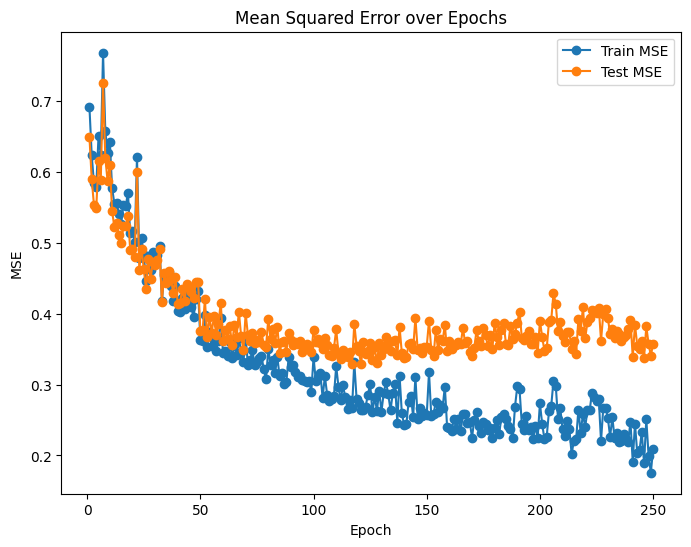

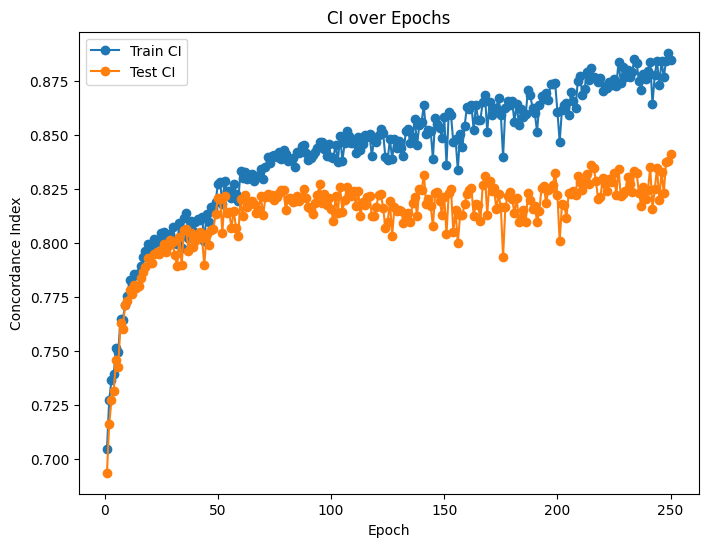

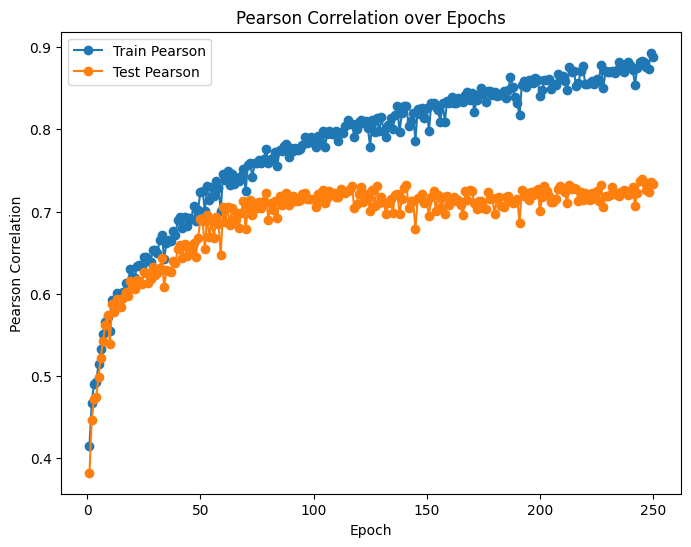

In [3]:
#model 1
import os
import warnings
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import MSELoss
from torch_geometric.nn import GCNConv, global_mean_pool as gep
from torch_geometric.data import Data, Batch
from sklearn.model_selection import train_test_split
from tqdm import tqdm
import numpy as np

# Optional, for plotting:
import matplotlib.pyplot as plt

##############################################################################
#                               1. METRICS
##############################################################################

@torch.no_grad()
def ci_vectorized(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    Naive O(N^2) Concordance Index using vectorized GPU operations.
    preds, targets: (N,) on the same device (e.g. cuda).
    """
    # (N, N) differences
    p_diff = preds.unsqueeze(1) - preds.unsqueeze(0)
    t_diff = targets.unsqueeze(1) - targets.unsqueeze(0)
    # mask out pairs where targets are identical
    mask = (t_diff != 0)
    # sign of product => +1 (concordant), 0 (tie), -1 (discordant)
    sign_mat = torch.sign(p_diff * t_diff)
    # step function h(x): 1 if x>0, 0.5 if x=0, 0 if x<0
    h = (sign_mat == 1).float() + 0.5 * (sign_mat == 0).float()
    # apply mask
    h_masked = h * mask.float()
    c = h_masked.sum()
    s = mask.sum().float()
    return (c / s).item() if s > 0 else 0.0

@torch.no_grad()
def mse_torch(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    GPU-friendly MSE using torch's built-in mean squared error.
    """
    return F.mse_loss(preds, targets, reduction='mean').item()

@torch.no_grad()
def pearson_torch(preds: torch.Tensor, targets: torch.Tensor) -> float:
    """
    Pearson correlation coefficient in PyTorch (GPU-friendly).
    preds, targets: (N,) on the same device
    """
    p_centered = preds - preds.mean()
    t_centered = targets - targets.mean()
    cov = (p_centered * t_centered).sum()
    denom = torch.sqrt((p_centered**2).sum()) * torch.sqrt((t_centered**2).sum())
    eps = 1e-8
    return (cov / (denom + eps)).item()

##############################################################################
#                       2. GNN MODEL DEFINITION
##############################################################################

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool as gep


class BidirectionalCrossAttention(nn.Module):
    def __init__(self, embed_dim=128, num_heads=4, chunk_size=2048):
        super().__init__()
        """
        Bidirectional Cross-Attention Formulas:
        
        For Graph A → Graph B:
            Q_A = X_A W_Q_A, K_B = X_B W_K_A, V_B = X_B W_V_A
            Z_A = softmax(Q_A K_B^T / √d) V_B
            
        For Graph B → Graph A:
            Q_B = X_B W_Q_B, K_A = X_A W_K_B, V_A = X_A W_V_B
            Z_B = softmax(Q_B K_A^T / √d) V_A
        """
        self.embed_dim = embed_dim
        self.chunk_size = chunk_size  # Adjust this value to control memory usage
        
        # Graph A → Graph B weights
        self.W_Q_A = nn.Linear(embed_dim, embed_dim)
        self.W_K_A = nn.Linear(embed_dim, embed_dim)
        self.W_V_A = nn.Linear(embed_dim, embed_dim)
        
        # Graph B → Graph A weights
        self.W_Q_B = nn.Linear(embed_dim, embed_dim)
        self.W_K_B = nn.Linear(embed_dim, embed_dim)
        self.W_V_B = nn.Linear(embed_dim, embed_dim)
        
        self.scale = 1.0 / torch.sqrt(torch.tensor(embed_dim, dtype=torch.float32))

    def forward(self, X_A, X_B, batch_A, batch_B):
        """
        Args:
            X_A: Graph A node embeddings [total_A_nodes, embed_dim]
            X_B: Graph B node embeddings [total_B_nodes, embed_dim]
            batch_A: Batch indices for Graph A [total_A_nodes]
            batch_B: Batch indices for Graph B [total_B_nodes]
        Returns:
            Z_A: Updated embeddings for Graph A (same shape as X_A)
            Z_B: Updated embeddings for Graph B (same shape as X_B)
        """
        # Compute linear projections for both directions
        Q_A = self.W_Q_A(X_A)  # [N_A, embed_dim]
        K_B = self.W_K_A(X_B)  # [N_B, embed_dim]
        V_B = self.W_V_A(X_B)  # [N_B, embed_dim]
        
        Q_B = self.W_Q_B(X_B)  # [N_B, embed_dim]
        K_A = self.W_K_B(X_A)  # [N_A, embed_dim]
        V_A = self.W_V_B(X_A)  # [N_A, embed_dim]
        
        # Create mask so that only nodes from the same sample attend to each other
        mask_AB = self._create_mask(batch_A, batch_B)  # [N_A, N_B]
        mask_BA = mask_AB.T  # [N_B, N_A]
        
        # Compute Z_A in chunks to reduce memory usage
        Z_A_chunks = []
        for i in range(0, Q_A.size(0), self.chunk_size):
            Q_A_chunk = Q_A[i:i+self.chunk_size]  # [chunk_size, embed_dim]
            # Compute attention scores for this chunk: [chunk_size, N_B]
            scores_chunk = (Q_A_chunk @ K_B.T) * self.scale
            mask_chunk = mask_AB[i:i+self.chunk_size]  # [chunk_size, N_B]
            scores_chunk = scores_chunk.masked_fill(~mask_chunk, -1e9)
            attn_chunk = F.softmax(scores_chunk, dim=-1)
            Z_A_chunk = attn_chunk @ V_B  # [chunk_size, embed_dim]
            Z_A_chunks.append(Z_A_chunk)
        Z_A = torch.cat(Z_A_chunks, dim=0)
        
        # Similarly, compute Z_B in chunks along the query dimension of Graph B
        Z_B_chunks = []
        for i in range(0, Q_B.size(0), self.chunk_size):
            Q_B_chunk = Q_B[i:i+self.chunk_size]  # [chunk_size, embed_dim]
            scores_chunk = (Q_B_chunk @ K_A.T) * self.scale  # [chunk_size, N_A]
            mask_chunk = mask_BA[i:i+self.chunk_size]  # [chunk_size, N_A]
            scores_chunk = scores_chunk.masked_fill(~mask_chunk, -1e9)
            attn_chunk = F.softmax(scores_chunk, dim=-1)
            Z_B_chunk = attn_chunk @ V_A  # [chunk_size, embed_dim]
            Z_B_chunks.append(Z_B_chunk)
        Z_B = torch.cat(Z_B_chunks, dim=0)
        
        return Z_A, Z_B

    def _create_mask(self, batch_A, batch_B):
        """Creates a mask [N_A, N_B] so that nodes only attend to nodes from the same sample."""
        return batch_A.unsqueeze(1) == batch_B.unsqueeze(0)


#############################################
# Updated GNN Model with Cross-Attention (No Extra Projection)
#############################################
class GNNNet(torch.nn.Module):
    def __init__(self, n_output=1, num_features_pro=54, num_features_mol=78, output_dim=128, dropout=0.2):
        super(GNNNet, self).__init__()
        print('GNNNet Loaded')
        self.n_output = n_output
        
        # --- Molecule branch GCN layers ---
        self.mol_conv1 = GCNConv(num_features_mol, num_features_mol)
        # Set GCN2 to output 'output_dim' so that both branches share the same dimension.
        self.mol_conv2 = GCNConv(num_features_mol, 156)
        # GCN3 will process the updated features; input dim = output_dim.
        self.mol_conv3 = GCNConv(156, num_features_mol*4)
        
        self.mol_fc_g1 = nn.Linear(num_features_mol*4, 1024)
        self.mol_fc_g2 = nn.Linear(1024, output_dim)
        
        # --- Protein branch GCN layers ---
        self.pro_conv1 = GCNConv(num_features_pro, num_features_pro)
        self.pro_conv2 = GCNConv(num_features_pro, 156)
        self.pro_conv3 = GCNConv(156, num_features_pro*4)
        
        self.pro_fc_g1 = nn.Linear(num_features_pro*4, 1024)
        self.pro_fc_g2 = nn.Linear(1024, output_dim)
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)
        
        # --- Bidirectional Cross-Attention ---
        # Now the node features from both branches are already in R^(output_dim)
        self.cross_attn = BidirectionalCrossAttention(embed_dim=156, num_heads=4)
        
        # --- Combined FC layers ---
        self.fc1 = nn.Linear(2 * output_dim, 1024)
        self.fc2 = nn.Linear(1024, 512)
        self.out = nn.Linear(512, self.n_output)

    def forward(self, data_mol, data_pro):
        # Unpack molecule graph data
        mol_x, mol_edge_index, mol_batch = data_mol.x, data_mol.edge_index, data_mol.batch
        # Unpack protein graph data
        target_x, target_edge_index, target_batch = data_pro.x, data_pro.edge_index, data_pro.batch

        # --- Molecule branch: GCN1 -> GCN2 ---
        x = self.mol_conv1(mol_x, mol_edge_index)
        x = self.relu(x)
        x = self.mol_conv2(x, mol_edge_index)
        x = self.relu(x)
        # x now has shape: [total_mol_nodes, output_dim]
        
        # --- Protein branch: GCN1 -> GCN2 ---
        xt = self.pro_conv1(target_x, target_edge_index)
        xt = self.relu(xt)
        xt = self.pro_conv2(xt, target_edge_index)
        xt = self.relu(xt)
        # xt now has shape: [total_pro_nodes, output_dim]
        
        # --- Apply bidirectional cross-attention ---
        # The cross-attention module uses batch indices to ensure nodes only attend to nodes from the same sample.
        Xnew, XtNew = self.cross_attn(x, xt, mol_batch, target_batch)
        
        # --- Continue with third GCN layer using the updated features ---
        x_updated = self.mol_conv3(Xnew, mol_edge_index)
        x_updated = self.relu(x_updated)
        x_pooled = gep(x_updated, mol_batch)  # Global pooling for molecule graphs
        
        xt_updated = self.pro_conv3(XtNew, target_edge_index)
        xt_updated = self.relu(xt_updated)
        xt_pooled = gep(xt_updated, target_batch)  # Global pooling for protein graphs
        
        # --- Flatten branch outputs through FC layers ---
        x_final = self.mol_fc_g2(self.relu(self.mol_fc_g1(x_pooled)))
        x_final = self.dropout(x_final)
        xt_final = self.pro_fc_g2(self.relu(self.pro_fc_g1(xt_pooled)))
        xt_final = self.dropout(xt_final)
        
        # --- Concatenate and apply combined FC layers ---
        xc = torch.cat((x_final, xt_final), dim=1)
        xc = self.fc1(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        xc = self.fc2(xc)
        xc = self.relu(xc)
        xc = self.dropout(xc)
        out = self.out(xc)
        
        return out

##############################################################################
#                   3. DATA LOADING HELPERS
##############################################################################

warnings.filterwarnings('ignore', category=FutureWarning)

def load_sample(path):
    """
    Load a .pt sample, fix up 'x' and 'edge_index', return (mol_data, pro_data, target).
    """
    sample = torch.load(path)
    mol_data, pro_data, target = sample[0], sample[1], sample[2]

    # Convert dict to Data if needed
    if isinstance(mol_data, dict):
        mol_data = Data(**mol_data)
    if isinstance(pro_data, dict):
        pro_data = Data(**pro_data)

    # Fix x
    if not hasattr(mol_data, 'x') or mol_data.x is None:
        if hasattr(mol_data, 'features'):
            mol_data.x = mol_data.features
            del mol_data.features
        else:
            raise ValueError("mol_data missing 'x' or 'features'")
    if not hasattr(pro_data, 'x') or pro_data.x is None:
        if hasattr(pro_data, 'features'):
            pro_data.x = pro_data.features
            del pro_data.features
        else:
            raise ValueError("pro_data missing 'x' or 'features'")

    mol_data.x = torch.as_tensor(mol_data.x, dtype=torch.float32)
    pro_data.x = torch.as_tensor(pro_data.x, dtype=torch.float32)

    # Fix edge_index
    def fix_edge_index(d):
        if not isinstance(d.edge_index, torch.Tensor):
            d.edge_index = torch.tensor(d.edge_index, dtype=torch.long)
        else:
            d.edge_index = d.edge_index.long()
        if d.edge_index.shape[0] != 2:
            d.edge_index = d.edge_index.t()
        d.num_nodes = d.x.size(0)

    fix_edge_index(mol_data)
    fix_edge_index(pro_data)

    return (mol_data, pro_data, target)

def batch_loader(file_list, sample_dir, batch_size):
    """
    Yields batches of (mol_data, pro_data, target) from file_list.
    """
    batch = []
    for file_name in file_list:
        path = os.path.join(sample_dir, file_name)
        sample = load_sample(path)
        batch.append(sample)
        if len(batch) == batch_size:
            yield batch
            batch = []
    if batch:
        yield batch

##############################################################################
#              4. TRAINING / EVALUATION WITH METRICS EACH EPOCH
##############################################################################

import os
import torch

def train_and_evaluate(sample_dir, num_epochs=10, test_size=0.2, lr=0.001):
    """
    Trains the GNN model, evaluates on train & test each epoch, saves metrics + checkpoints.
    """
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Running on {device}.")

    # Gather samples
    sample_files = [f for f in os.listdir(sample_dir) if f.endswith('.pt')]
    assert len(sample_files) > 0, "No .pt files found in sample_dir!"

    # Split
    train_files, test_files = train_test_split(sample_files, test_size=test_size, random_state=42)

    # Make checkpoint dir
    training_model_dir = os.path.join(os.getcwd(), 'TrainingModel1')
    os.makedirs(training_model_dir, exist_ok=True)
    print(f"Checkpoints will be saved to: {training_model_dir}")

    metrics_path = os.path.join(training_model_dir, "training_metrics.pt")

    # Load existing metrics if available (Ensures metrics continue from previous runs)
    if os.path.exists(metrics_path):
        saved_metrics = torch.load(metrics_path)
        train_metrics = saved_metrics['train_metrics']
        test_metrics = saved_metrics['test_metrics']
        print("Loaded previous training metrics!")
    else:
        train_metrics = {'epoch': [], 'mse': [], 'ci': [], 'pearson': []}
        test_metrics = {'epoch': [], 'mse': [], 'ci': [], 'pearson': []}
        print("Starting fresh metrics tracking.")

    # Infer input dims from one sample
    sample0 = load_sample(os.path.join(sample_dir, train_files[0]))
    mol_data0, pro_data0 = sample0[0], sample0[1]
    num_features_mol = mol_data0.x.size(1)
    num_features_pro = pro_data0.x.size(1)

    # Initialize model
    model = GNNNet(num_features_mol=num_features_mol,
                   num_features_pro=num_features_pro).to(device)
    optimizer = optim.Adam(model.parameters(), lr=lr)
    loss_fn = MSELoss()

    # Possibly resume from checkpoint
    start_epoch = 1
    existing_checkpoints = [
        f for f in os.listdir(training_model_dir)
        if f.endswith('.pt') and f.startswith('model_epoch')
    ]
    last_ckpt_path = None  # Track previous checkpoint for deletion

    if existing_checkpoints:
        latest_ckpt = max(existing_checkpoints, key=lambda x: int(x.split('_epoch')[1].split('.pt')[0]))
        ckpt_path = os.path.join(training_model_dir, latest_ckpt)
        print(f"Loading checkpoint from {ckpt_path}")
        ckpt = torch.load(ckpt_path, map_location=device)
        model.load_state_dict(ckpt['model_state_dict'])
        optimizer.load_state_dict(ckpt['optimizer_state_dict'])
        loaded_epoch = ckpt['epoch']
        start_epoch = loaded_epoch + 1
        last_ckpt_path = ckpt_path  # Store last checkpoint path for deletion
        print(f"Resuming from epoch {start_epoch}")
    else:
        print("No existing checkpoint found; starting fresh.")

    @torch.no_grad()
    def evaluate(files):
        model.eval()
        all_preds = []
        all_targets = []
        batch_eval_size = 200
        for batch_samples in batch_loader(files, sample_dir, batch_eval_size):
            mol_list, pro_list, tgt_list = [], [], []
            for (md, pd, t) in batch_samples:
                mol_list.append(md)
                pro_list.append(pd)
                tgt_list.append(t)

            mol_batch = Batch.from_data_list(mol_list).to(device)
            pro_batch = Batch.from_data_list(pro_list).to(device)
            t_tensor = torch.tensor(tgt_list, dtype=torch.float32, device=device)

            out = model(mol_batch, pro_batch).view(-1)
            all_preds.append(out)
            all_targets.append(t_tensor)

        all_preds = torch.cat(all_preds, dim=0)
        all_targets = torch.cat(all_targets, dim=0)

        mse_val = mse_torch(all_preds, all_targets)
        ci_val = ci_vectorized(all_preds, all_targets)
        pearson_val = pearson_torch(all_preds, all_targets)
        return mse_val, ci_val, pearson_val

    # Training loop
    batch_size = 60
    for epoch in tqdm(range(start_epoch, num_epochs + 1), desc="Training", unit="epoch"):
        model.train()
        running_loss = 0.0

        for batch_samples in batch_loader(train_files, sample_dir, batch_size):
            mol_list, pro_list, tgt_list = [], [], []
            for (md, pd, t) in batch_samples:
                mol_list.append(md)
                pro_list.append(pd)
                tgt_list.append(t)

            mol_batch = Batch.from_data_list(mol_list).to(device)
            pro_batch = Batch.from_data_list(pro_list).to(device)
            t_tensor = torch.tensor(tgt_list, dtype=torch.float32, device=device).view(-1)

            optimizer.zero_grad()
            out = model(mol_batch, pro_batch).view(-1)
            loss = loss_fn(out, t_tensor)
            loss.backward()
            optimizer.step()

            running_loss += loss.item() * len(batch_samples)

        avg_loss = running_loss / len(train_files)
        tqdm.write(f"[Epoch {epoch}/{num_epochs}] Training Loss: {avg_loss:.4f}")

        # Evaluate on train & test
        train_mse, train_ci, train_pearson = evaluate(train_files)
        test_mse, test_ci, test_pearson = evaluate(test_files)

        train_metrics['epoch'].append(epoch)
        train_metrics['mse'].append(train_mse)
        train_metrics['ci'].append(train_ci)
        train_metrics['pearson'].append(train_pearson)

        test_metrics['epoch'].append(epoch)
        test_metrics['mse'].append(test_mse)
        test_metrics['ci'].append(test_ci)
        test_metrics['pearson'].append(test_pearson)

        tqdm.write(f"  Train => MSE={train_mse:.4f}, CI={train_ci:.4f}, Pearson={train_pearson:.4f}")
        tqdm.write(f"  Test  => MSE={test_mse:.4f}, CI={test_ci:.4f}, Pearson={test_pearson:.4f}")

        # Save new checkpoint
        ckpt_name = f"model_epoch{epoch}.pt"
        ckpt_path = os.path.join(training_model_dir, ckpt_name)
        torch.save({
            'epoch': epoch,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
        }, ckpt_path)
        tqdm.write(f"Checkpoint saved at epoch {epoch}")

        # Delete the previous checkpoint after saving the new one
        if last_ckpt_path and os.path.exists(last_ckpt_path):
            os.remove(last_ckpt_path)
            tqdm.write(f"Deleted previous checkpoint: {last_ckpt_path}")

        # Update last checkpoint path
        last_ckpt_path = ckpt_path

        # Save/Update the metrics after each epoch
        torch.save({
            'train_metrics': train_metrics,
            'test_metrics': test_metrics
        }, metrics_path)

    # Final evaluations
    final_train_mse, final_train_ci, final_train_pearson = evaluate(train_files)
    final_test_mse, final_test_ci, final_test_pearson = evaluate(test_files)
    print(f"\nFinal Train => MSE={final_train_mse:.4f}, CI={final_train_ci:.4f}, Pearson={final_train_pearson:.4f}")
    print(f"Final Test  => MSE={final_test_mse:.4f}, CI={final_test_ci:.4f}, Pearson={final_test_pearson:.4f}")

    # Save final metrics
    torch.save({
        'train_metrics': train_metrics,
        'test_metrics': test_metrics
    }, metrics_path)
    print(f"Metrics saved to {metrics_path}")

    return train_metrics, test_metrics


##############################################################################
#               5. OPTIONAL: PLOT THE SAVED METRICS
##############################################################################

def plot_metrics(checkpoint_dir='TrainingModel1'):
    """
    Load training_metrics.pt from the checkpoint_dir and plot MSE, CI, Pearson over epochs.
    """
    metrics_path = os.path.join(checkpoint_dir, "training_metrics.pt")
    if not os.path.exists(metrics_path):
        print(f"No metrics file found at {metrics_path}!")
        return

    saved_data = torch.load(metrics_path)
    train_metrics = saved_data['train_metrics']
    test_metrics = saved_data['test_metrics']
    epochs = train_metrics['epoch']

    # Plot MSE
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['mse'], 'o-', label='Train MSE')
    plt.plot(epochs, test_metrics['mse'], 'o-', label='Test MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('Mean Squared Error over Epochs')
    plt.legend()
    plt.savefig(os.path.join(checkpoint_dir, "MSE_plot.png"))  
    plt.show()

    # Plot CI
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['ci'], 'o-', label='Train CI')
    plt.plot(epochs, test_metrics['ci'], 'o-', label='Test CI')
    plt.xlabel('Epoch')
    plt.ylabel('Concordance Index')
    plt.title('CI over Epochs')
    plt.legend()
    plt.savefig(os.path.join(checkpoint_dir, "CI_plot.png"))  
    plt.show()

    # Plot Pearson
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, train_metrics['pearson'], 'o-', label='Train Pearson')
    plt.plot(epochs, test_metrics['pearson'], 'o-', label='Test Pearson')
    plt.xlabel('Epoch')
    plt.ylabel('Pearson Correlation')
    plt.title('Pearson Correlation over Epochs')
    plt.legend()
    plt.savefig(os.path.join(checkpoint_dir, "PEARSON_plot.png"))  
    plt.show()

##############################################################################
#                                 MAIN
##############################################################################

if __name__ == "__main__":
    # Adjust the paths/parameters as needed
    SAMPLE_DIR = "prepared_samples"   # Directory with your .pt samples
    NUM_EPOCHS = 250
    TEST_SPLIT = 0.2
    LR = 0.001

    # 1) Train and evaluate
    train_metrics, test_metrics = train_and_evaluate(
        sample_dir=SAMPLE_DIR,
        num_epochs=NUM_EPOCHS,
        test_size=TEST_SPLIT,
        lr=LR
    )

    # 2) Plot the metrics
    plot_metrics('TrainingModel1')

